In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
# Specify the file path
file_path = 'data.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
display(df)


,COMPANY,DATE,JOB_ID,JOB_FUNCTION,JOB_REGION,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,Company_ABC,2018-01-01,4022,Marketing,Asia Pacific,56214,962,229
1,Company_ABC,2018-01-02,6211,Operations,Latin America,49541,776,251
2,Company_ABC,2018-01-03,4538,Engineering,Europe,49195,962,278
3,Company_ABC,2018-01-04,2583,Finance,Asia Pacific,17326,1476,137
4,Company_ABC,2018-01-05,3266,Operations,North America,51497,558,104
...,...,...,...,...,...,...,...,...
1501,Company_ABC,2019-03-20,6516,Operations,Latin America,31398,1227,282
1502,Company_ABC,2019-03-21,4020,IT,Europe,76144,1187,156
1503,Company_ABC,2019-03-22,3529,IT,Latin America,21260,902,268
1504,Company_ABC,2019-03-23,5273,Human Resources,Asia Pacific,49453,658,270


In [51]:
# Add some columns to the DF that may help with analysis
df['POSTED_MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['POSTED_YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['POSTED_DAY'] = pd.DatetimeIndex(df['DATE']).day
df['POSTED_DAY_OF_WEEK'] = pd.DatetimeIndex(df['DATE']).dayofweek
df['POSTED_QUARTER'] = df['MONTH'].apply(lambda x: (x-1)//3 + 1)
df['POSTED_YEAR_QUARTER'] = df['YEAR'].astype(str) + 'Q' + df['QUARTER'].astype(str)

# Used 25 days as average time a job is posted before it is filled
# Big assumption and not sure it would be useful in this analysis as having a set closing time
# It doesn't help determine how some jobs may be performing as far as applications / day
df['DATE_FILLED'] = df['DATE'] + timedelta(days=25)
df['DATE_FILLED_MONTH'] = pd.DatetimeIndex(df['DATE_FILLED']).month
df['DATE_FILLED_YEAR'] = pd.DatetimeIndex(df['DATE_FILLED']).year
df['DATE_FILLED_DAY'] = pd.DatetimeIndex(df['DATE_FILLED']).day
df['DATE_FILLED_DAY_OF_WEEK'] = pd.DatetimeIndex(df['DATE_FILLED']).dayofweek
df['DATE_FILLED_QUARTER'] = df['DATE_FILLED_MONTH'].apply(lambda x: (x-1)//3 + 1)
df['DATE_FILLED_YEAR_QUARTER'] = df['DATE_FILLED_YEAR'].astype(str) + 'Q' + df['DATE_FILLED_QUARTER'].astype(str)


In [6]:
# get a list of the columns
columns_list = list(df.columns)

# Number of unique values in JOB_ID column
num_unique_jobs = df['JOB_ID'].nunique()
# List of unique values in JOB_ID column
jobs_list = list(df['JOB_ID'].unique())
# Number of unique values in JOB_FUNCTION column
num_unique_job_functions = df['JOB_FUNCTION'].nunique()
# List of unique values in JOB_FUNCTION column
job_functions_list = list(df['JOB_FUNCTION'].unique())
# Display the number of unique job functions
job_regions_list = list(df['JOB_REGION'].unique())

Now that we have some fields and lists made, we can start to do some analysis. Let's look at all jobs regardless of function and region. We will use the `groupby` function to group the data by region and then use the `describe` function to get some summary statistics.

,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,329,14647639,325701,65251
1,2018Q2,294,13574763,296911,60324
2,2018Q3,235,10284137,240070,48270
3,2018Q4,408,18255277,414427,80447
4,2019Q1,238,10792891,238734,46982


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
count,5.000000,5.000000e+00,5.000000,5.000000
mean,300.800000,1.351094e+07,303168.600000,60254.800000
std,71.775344,3.225095e+06,72557.820352,13715.815641
min,235.000000,1.028414e+07,238734.000000,46982.000000
25%,238.000000,1.079289e+07,240070.000000,48270.000000
50%,294.000000,1.357476e+07,296911.000000,60324.000000
75%,329.000000,1.464764e+07,325701.000000,65251.000000
max,408.000000,1.825528e+07,414427.000000,80447.000000


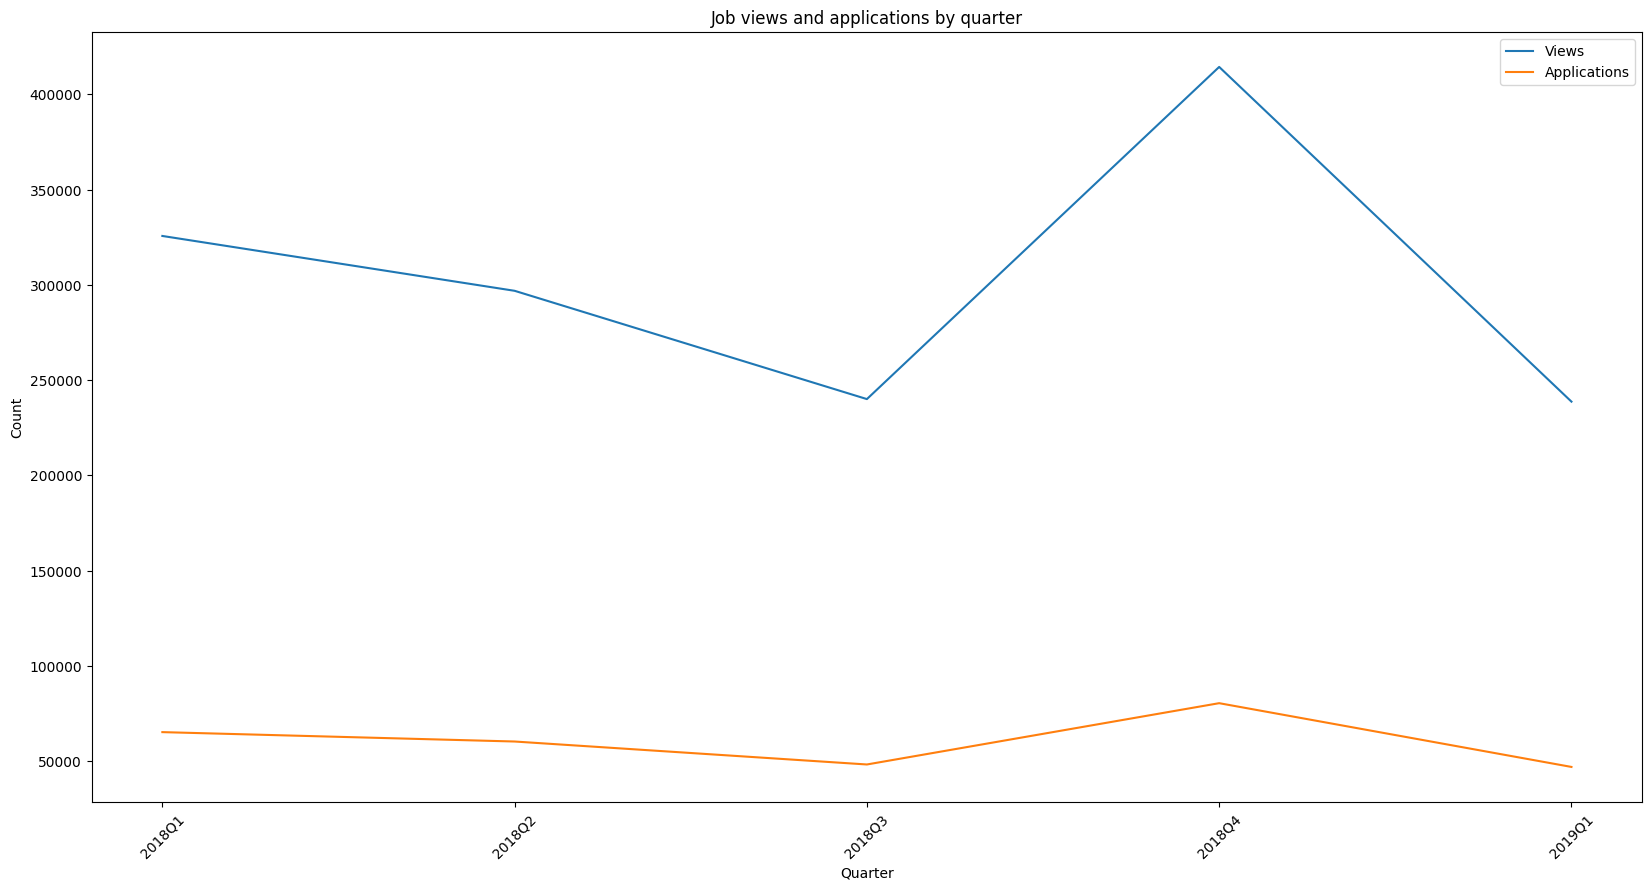

In [152]:
df_region = df.copy()
df_region = df_region[~((df_region['POSTED_YEAR'] == 2019) & (df_region['POSTED_QUARTER'] == 2))]

df_region = df_region.groupby(['POSTED_YEAR_QUARTER']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
display(df_region)
display(df_region.describe())

plt.figure(figsize=(20, 10))

# # plotting job impressions
# plt.plot(df_region['YEAR_QUARTER'], df_region['JOB_IMPRESSIONS'], label='Impressions')

# plotting job views
plt.plot(df_region['POSTED_YEAR_QUARTER'], df_region['JOB_VIEWS'], label='Views')

# plotting job applications
plt.plot(df_region['POSTED_YEAR_QUARTER'], df_region['JOB_APPLICATIONS'], label='Applications')

plt.title('Job views and applications by quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Let's look at some numbers by region. We will start by looking at some summaries by region. We will use the `groupby` function to group the data by region and then use the `describe` function to get some summary statistics.

########## Asia Pacific ##########


,DATE_FILLED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,71,2970530,72472,13963
1,2018Q2,76,3869206,78067,16012
2,2018Q3,62,2635486,63968,11758
3,2018Q4,95,3929760,99217,18632
4,2019Q1,68,3143025,67398,13536
5,2019Q2,18,883754,16113,3426


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
count,6.00000,6.000000e+00,6.000000,6.000000
mean,65.00000,2.905294e+06,66205.833333,12887.833333
std,25.62811,1.113450e+06,27515.124404,5198.745711
min,18.00000,8.837540e+05,16113.000000,3426.000000
25%,63.50000,2.719247e+06,64825.500000,12202.500000
50%,69.50000,3.056778e+06,69935.000000,13749.500000
75%,74.75000,3.687661e+06,76668.250000,15499.750000
max,95.00000,3.929760e+06,99217.000000,18632.000000


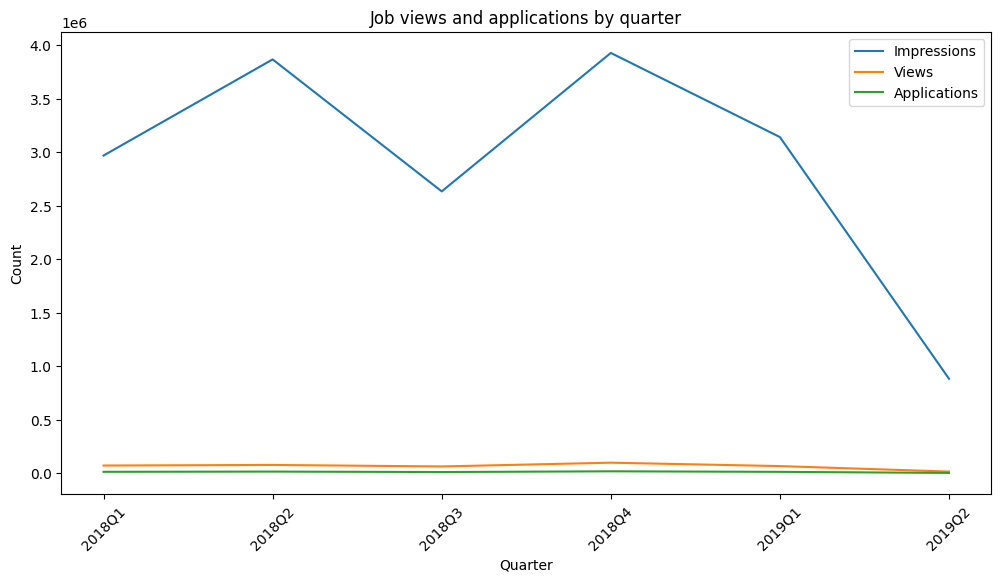

########## Latin America ##########


,DATE_FILLED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,56,2619494,55862,11710
1,2018Q2,83,3777838,81920,16611
2,2018Q3,49,2146480,47567,10425
3,2018Q4,104,4803915,103582,20768
4,2019Q1,74,3282733,73136,13892
5,2019Q2,21,1000263,19950,4825


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
count,6.000000,6.000000e+00,6.000000,6.000000
mean,64.500000,2.938454e+06,63669.500000,13038.500000
std,28.974126,1.325789e+06,29145.652408,5464.307193
min,21.000000,1.000263e+06,19950.000000,4825.000000
25%,50.750000,2.264734e+06,49640.750000,10746.250000
50%,65.000000,2.951114e+06,64499.000000,12801.000000
75%,80.750000,3.654062e+06,79724.000000,15931.250000
max,104.000000,4.803915e+06,103582.000000,20768.000000


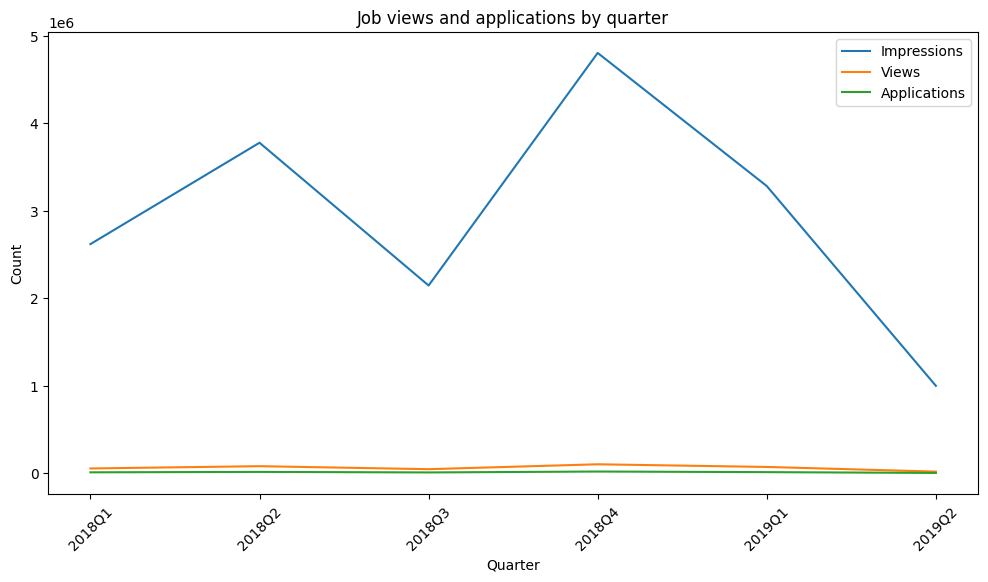

########## Europe ##########


,DATE_FILLED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,49,2189033,48160,9861
1,2018Q2,75,3814964,73295,14071
2,2018Q3,56,2617097,57339,11617
3,2018Q4,105,4479004,105523,21018
4,2019Q1,68,3192512,67464,13201
5,2019Q2,19,912635,20931,3882


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
count,6.000000,6.000000e+00,6.000000,6.000000
mean,62.000000,2.867541e+06,62118.666667,12275.000000
std,28.663566,1.260538e+06,28112.391009,5607.601091
min,19.000000,9.126350e+05,20931.000000,3882.000000
25%,50.750000,2.296049e+06,50454.750000,10300.000000
50%,62.000000,2.904804e+06,62401.500000,12409.000000
75%,73.250000,3.659351e+06,71837.250000,13853.500000
max,105.000000,4.479004e+06,105523.000000,21018.000000


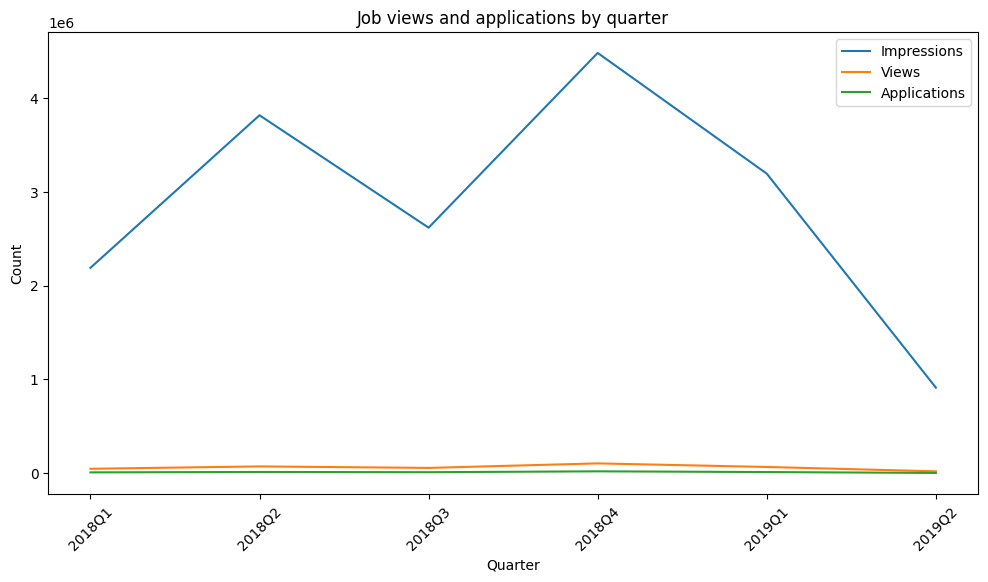

########## North America ##########


,DATE_FILLED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,53,2304150,52602,10751
1,2018Q2,75,3259875,73809,15850
2,2018Q3,52,2162810,53836,10704
3,2018Q4,101,4410171,105466,20048
4,2019Q1,64,2773304,66050,13075
5,2019Q2,12,496608,14181,2136


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
count,6.000000,6.000000e+00,6.000000,6.000000
mean,59.500000,2.567820e+06,60990.666667,12094.000000
std,29.453353,1.299145e+06,29935.482877,6020.523665
min,12.000000,4.966080e+05,14181.000000,2136.000000
25%,52.250000,2.198145e+06,52910.500000,10715.750000
50%,58.500000,2.538727e+06,59943.000000,11913.000000
75%,72.250000,3.138232e+06,71869.250000,15156.250000
max,101.000000,4.410171e+06,105466.000000,20048.000000


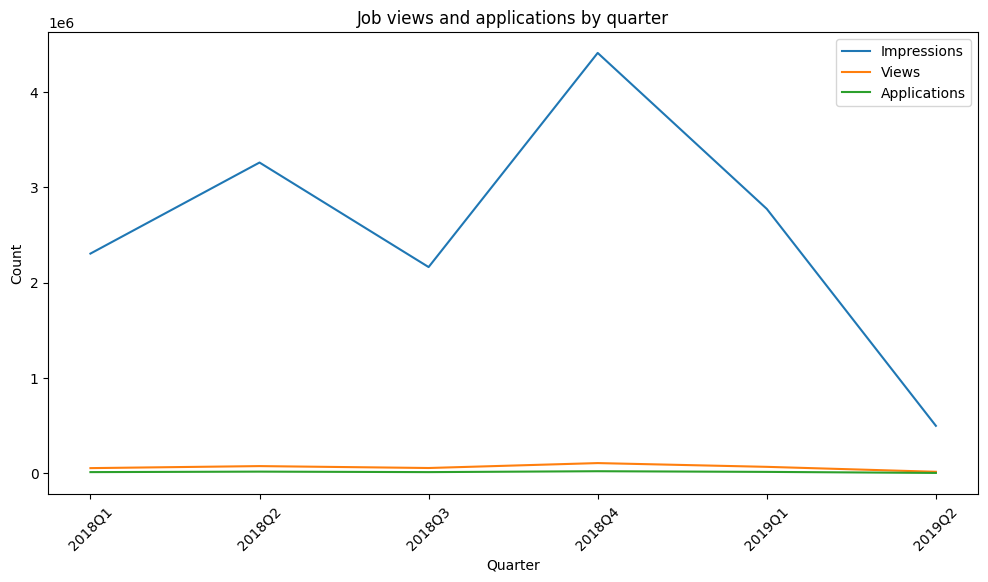

In [151]:
for region in job_regions_list:
    df_region = df[df['JOB_REGION'] == region]
    # df_region['YEAR_QUARTER'] = df_region['YEAR'].astype(str) + '-' + df_region['QUARTER'].astype(str)
    df_region = df_region.groupby(['DATE_FILLED_YEAR_QUARTER']).agg({
        'JOB_ID': 'count',
        'JOB_IMPRESSIONS': 'sum',
        'JOB_VIEWS': 'sum',
        'JOB_APPLICATIONS': 'sum'}).reset_index()
    print(f'########## {region} ##########')
    display(df_region)
    display(df_region.describe())
    
    plt.figure(figsize=(12, 6))

    # plotting job impressions
    plt.plot(df_region['DATE_FILLED_YEAR_QUARTER'], df_region['JOB_IMPRESSIONS'], label='Impressions')

    # plotting job views
    plt.plot(df_region['DATE_FILLED_YEAR_QUARTER'], df_region['JOB_VIEWS'], label='Views')

    # plotting job applications
    plt.plot(df_region['DATE_FILLED_YEAR_QUARTER'], df_region['JOB_APPLICATIONS'], label='Applications')

    plt.title('Job views and applications by quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

Let's look at numbers just for CY2018. We will use the `groupby` function to group the data by year. 

In [36]:
df_summary = df[df['YEAR'] ==2018].agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()

display(df_summary)

,index,0
0,JOB_ID,1266
1,JOB_IMPRESSIONS,56761816
2,JOB_VIEWS,1277109
3,JOB_APPLICATIONS,254292


Let's look at sums vs averages by quarter to see if there are any trends up and down. Noted that Q2 CY19, has 2 jobs, so we'll remove that from future trend analysis. 

In [56]:
df_region = df.copy()

df_region = df_region.groupby(['POSTED_YEAR_QUARTER']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
display(df_region)

df_region = df.__deepcopy__()

df_region = df_region.groupby(['DATE_FILLED_YEAR_QUARTER']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
display(df_region)


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,329,14647639,325701,65251
1,2018Q2,294,13574763,296911,60324
2,2018Q3,235,10284137,240070,48270
3,2018Q4,408,18255277,414427,80447
4,2019Q1,238,10792891,238734,46982
5,2019Q2,2,119940,2065,498


,DATE_FILLED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS
0,2018Q1,229,10083207,229096,46285
1,2018Q2,309,14721883,307091,62544
2,2018Q3,219,9561873,222710,44504
3,2018Q4,405,17622850,413788,80466
4,2019Q1,274,12391574,274048,53704
5,2019Q2,70,3293260,71175,14269


Let's look at the different function's performance by region by writing a quick for loop and using the `groupby` function to group the data by region and then use the `describe` function to get some summary statistics.

########## Asia Pacific - Marketing ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,11,516834,11639,1962,0.168571,178.363636
1,2018Q2,9,396523,9399,1903,0.202468,211.444444
2,2018Q3,6,240649,5558,1231,0.221483,205.166667
3,2018Q4,10,360826,9398,2240,0.238349,224.000000
4,2019Q1,8,418811,7829,1520,0.194150,190.000000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,8.800000,386728.600000,8764.600000,1771.20000,0.205004,201.794949
std,1.923538,100078.494185,2248.525361,396.37949,0.026622,17.928279
min,6.000000,240649.000000,5558.000000,1231.00000,0.168571,178.363636
25%,8.000000,360826.000000,7829.000000,1520.00000,0.194150,190.000000
50%,9.000000,396523.000000,9398.000000,1903.00000,0.202468,205.166667
75%,10.000000,418811.000000,9399.000000,1962.00000,0.221483,211.444444
max,11.000000,516834.000000,11639.000000,2240.00000,0.238349,224.000000


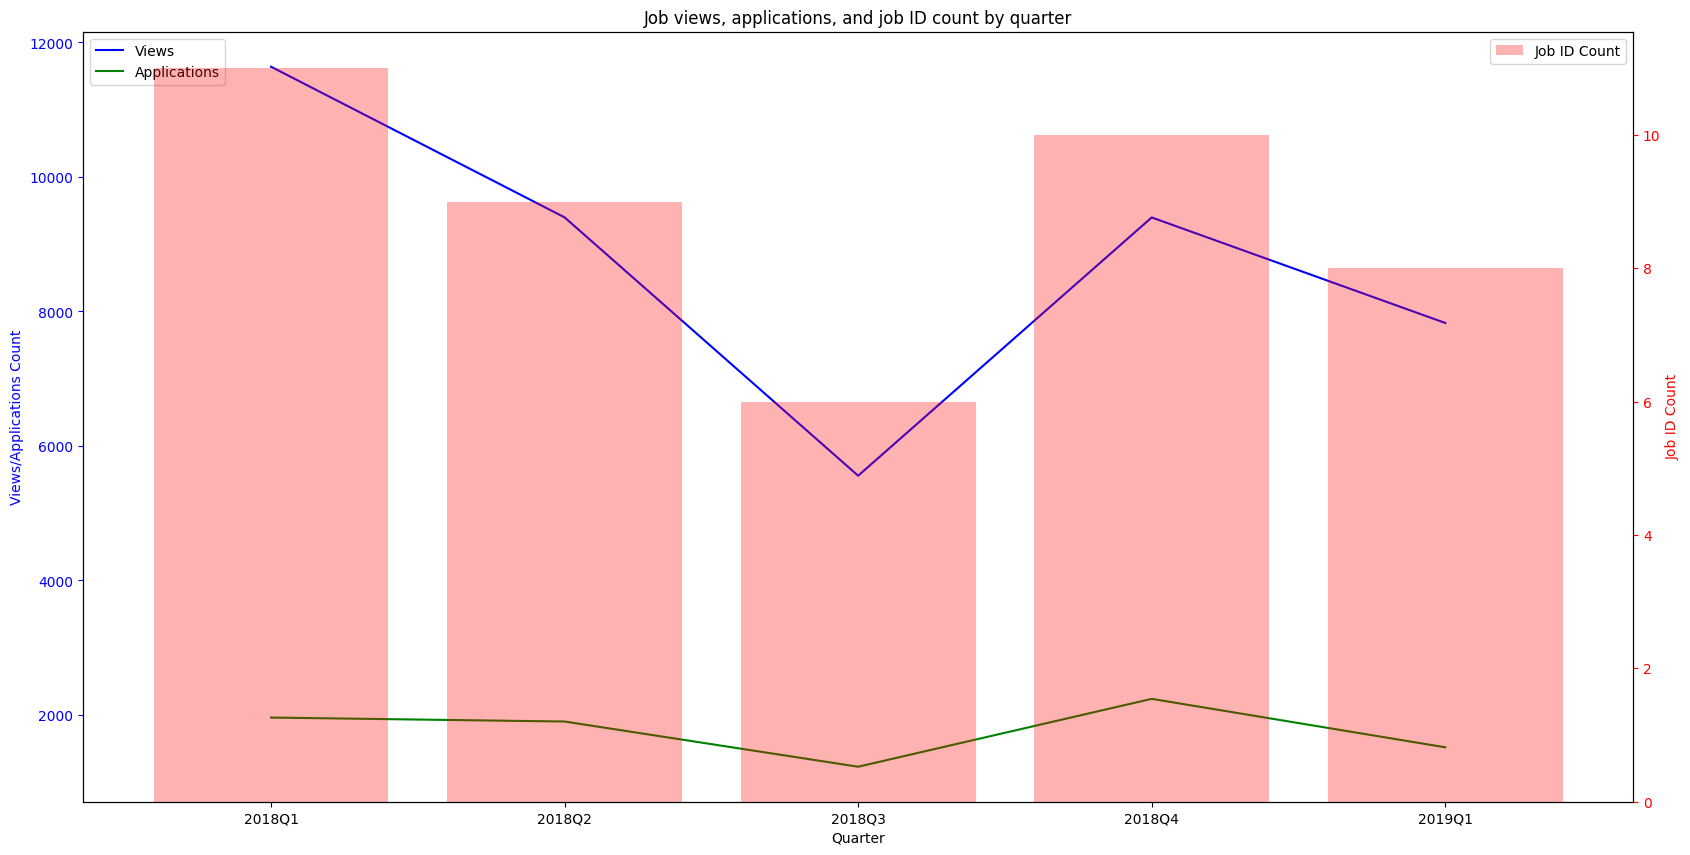

########## Asia Pacific - Operations ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,13,573009,13559,2361,0.174128,181.615385
1,2018Q2,11,528484,10735,2062,0.192082,187.454545
2,2018Q3,6,336281,6493,1285,0.197905,214.166667
3,2018Q4,16,644179,18527,2917,0.157446,182.312500
4,2019Q1,3,138738,3432,578,0.168415,192.666667


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.800000,444138.200000,10549.200000,1840.600000,0.177995,191.643153
std,5.263079,205329.416114,5912.825145,919.418458,0.016762,13.355878
min,3.000000,138738.000000,3432.000000,578.000000,0.157446,181.615385
25%,6.000000,336281.000000,6493.000000,1285.000000,0.168415,182.312500
50%,11.000000,528484.000000,10735.000000,2062.000000,0.174128,187.454545
75%,13.000000,573009.000000,13559.000000,2361.000000,0.192082,192.666667
max,16.000000,644179.000000,18527.000000,2917.000000,0.197905,214.166667


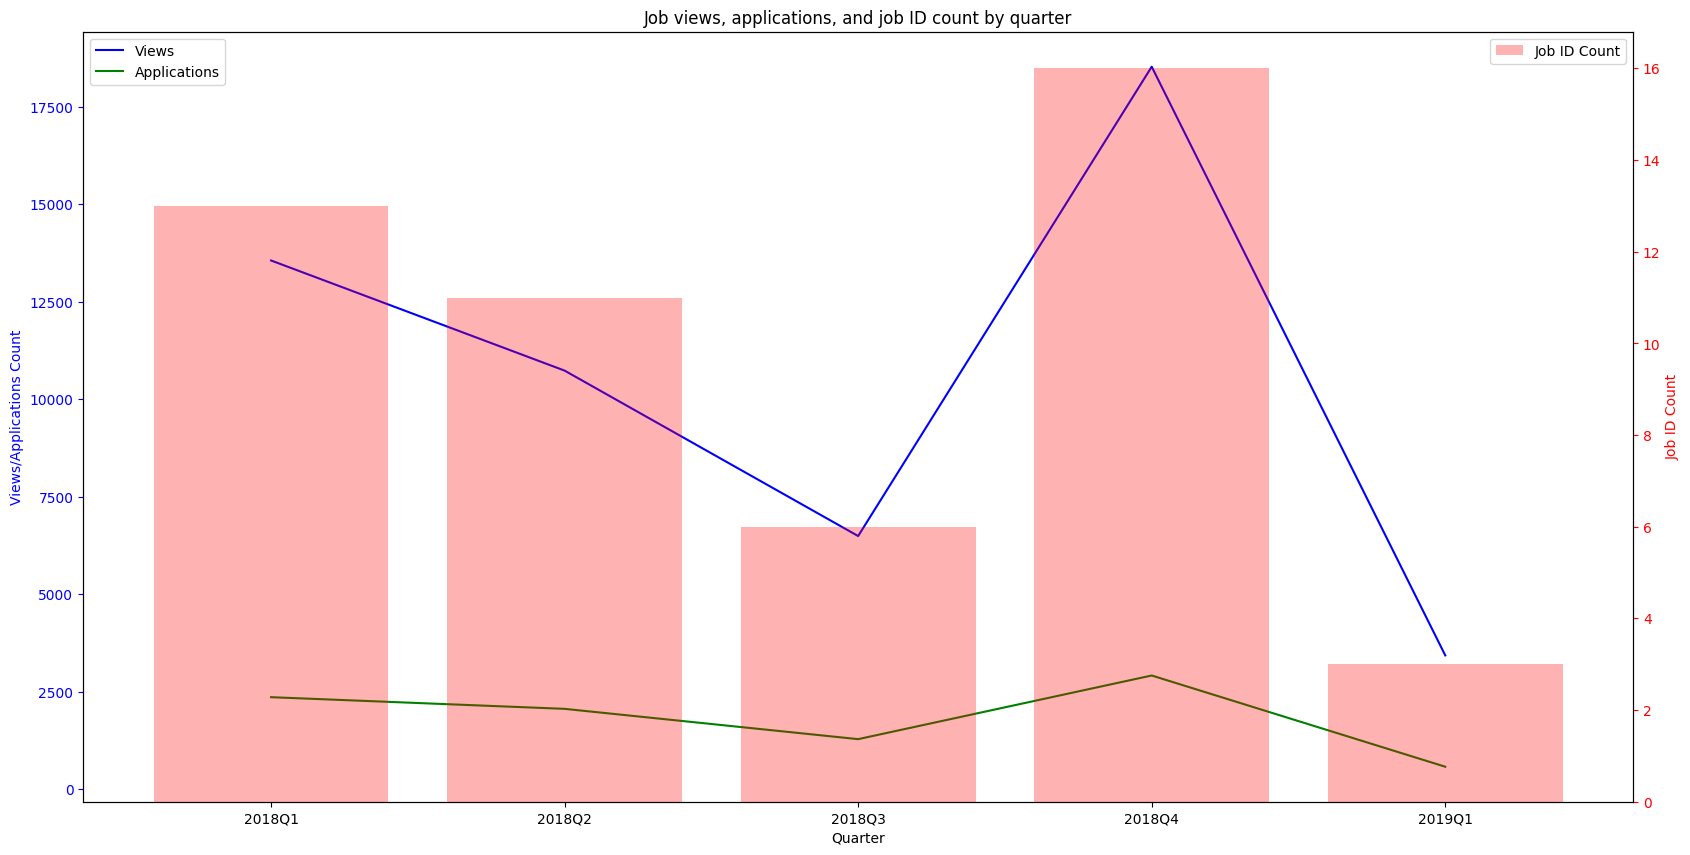

########## Asia Pacific - Engineering ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,20,827467,21691,4070,0.187635,203.500000
1,2018Q2,15,735128,14965,2984,0.199399,198.933333
2,2018Q3,6,233299,7096,1385,0.195180,230.833333
3,2018Q4,17,761561,17233,3464,0.201010,203.764706
4,2019Q1,13,627065,13105,2344,0.178863,180.307692


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,14.200000,636904.000000,14818.000000,2849.40000,0.192417,203.467813
std,5.263079,236904.717524,5377.165052,1035.08589,0.009176,18.068713
min,6.000000,233299.000000,7096.000000,1385.00000,0.178863,180.307692
25%,13.000000,627065.000000,13105.000000,2344.00000,0.187635,198.933333
50%,15.000000,735128.000000,14965.000000,2984.00000,0.195180,203.500000
75%,17.000000,761561.000000,17233.000000,3464.00000,0.199399,203.764706
max,20.000000,827467.000000,21691.000000,4070.00000,0.201010,230.833333


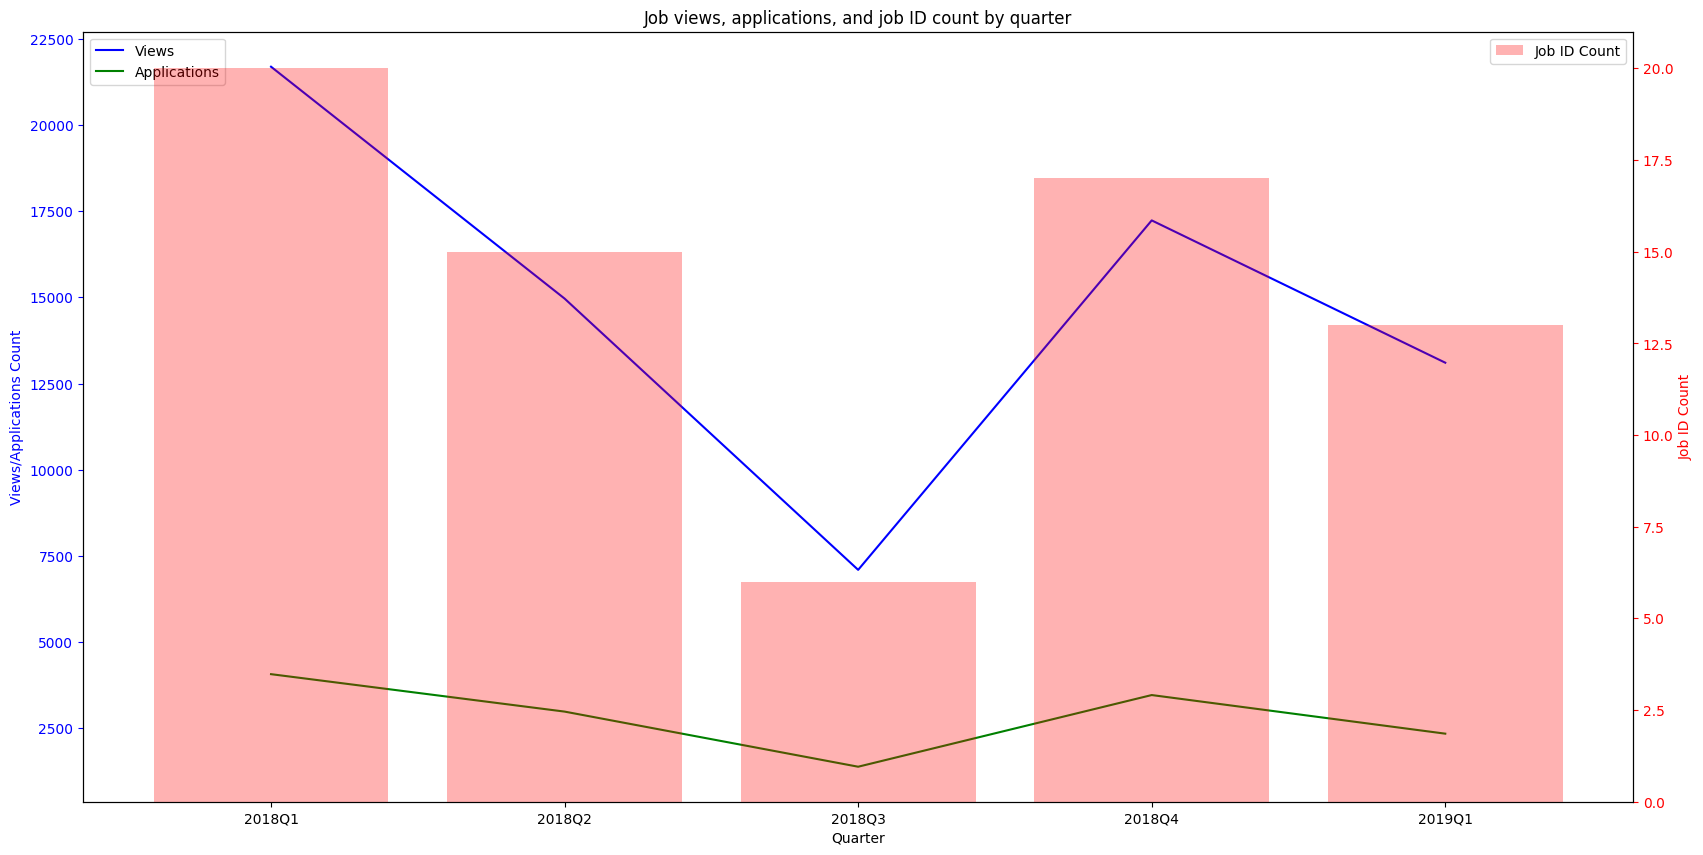

########## Asia Pacific - Finance ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,8,341077,8550,1507,0.176257,188.375000
1,2018Q2,9,410846,9137,2082,0.227865,231.333333
2,2018Q3,11,413757,11144,2270,0.203697,206.363636
3,2018Q4,12,585173,13056,2021,0.154795,168.416667
4,2019Q1,6,326975,6781,1218,0.179620,203.000000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.200000,415565.600000,9733.600000,1819.600000,0.188447,199.497727
std,2.387467,102699.880393,2423.956332,439.294093,0.028042,23.252203
min,6.000000,326975.000000,6781.000000,1218.000000,0.154795,168.416667
25%,8.000000,341077.000000,8550.000000,1507.000000,0.176257,188.375000
50%,9.000000,410846.000000,9137.000000,2021.000000,0.179620,203.000000
75%,11.000000,413757.000000,11144.000000,2082.000000,0.203697,206.363636
max,12.000000,585173.000000,13056.000000,2270.000000,0.227865,231.333333


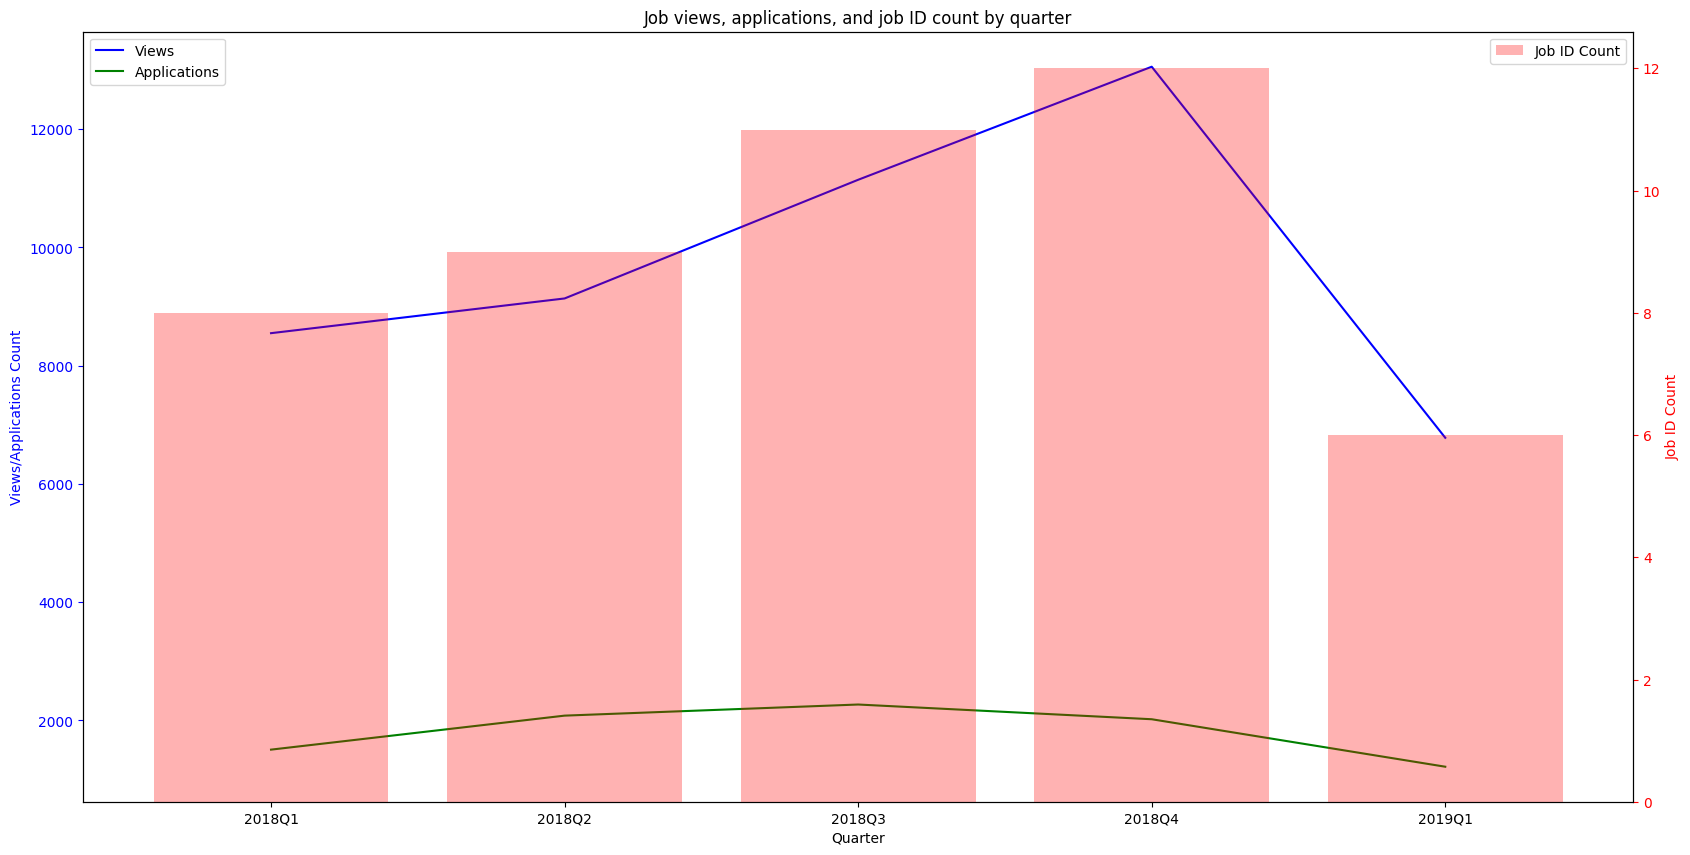

########## Asia Pacific - Sales ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,11,508980,9803,2233,0.227787,203.000000
1,2018Q2,8,386829,8411,1612,0.191654,201.500000
2,2018Q3,6,285147,6261,1164,0.185913,194.000000
3,2018Q4,14,624834,14212,2469,0.173726,176.357143
4,2019Q1,7,252335,6366,1467,0.230443,209.571429


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.200000,411625.000000,9010.600000,1789.000000,0.201905,196.885714
std,3.271085,155660.611513,3263.287805,544.328485,0.025687,12.741203
min,6.000000,252335.000000,6261.000000,1164.000000,0.173726,176.357143
25%,7.000000,285147.000000,6366.000000,1467.000000,0.185913,194.000000
50%,8.000000,386829.000000,8411.000000,1612.000000,0.191654,201.500000
75%,11.000000,508980.000000,9803.000000,2233.000000,0.227787,203.000000
max,14.000000,624834.000000,14212.000000,2469.000000,0.230443,209.571429


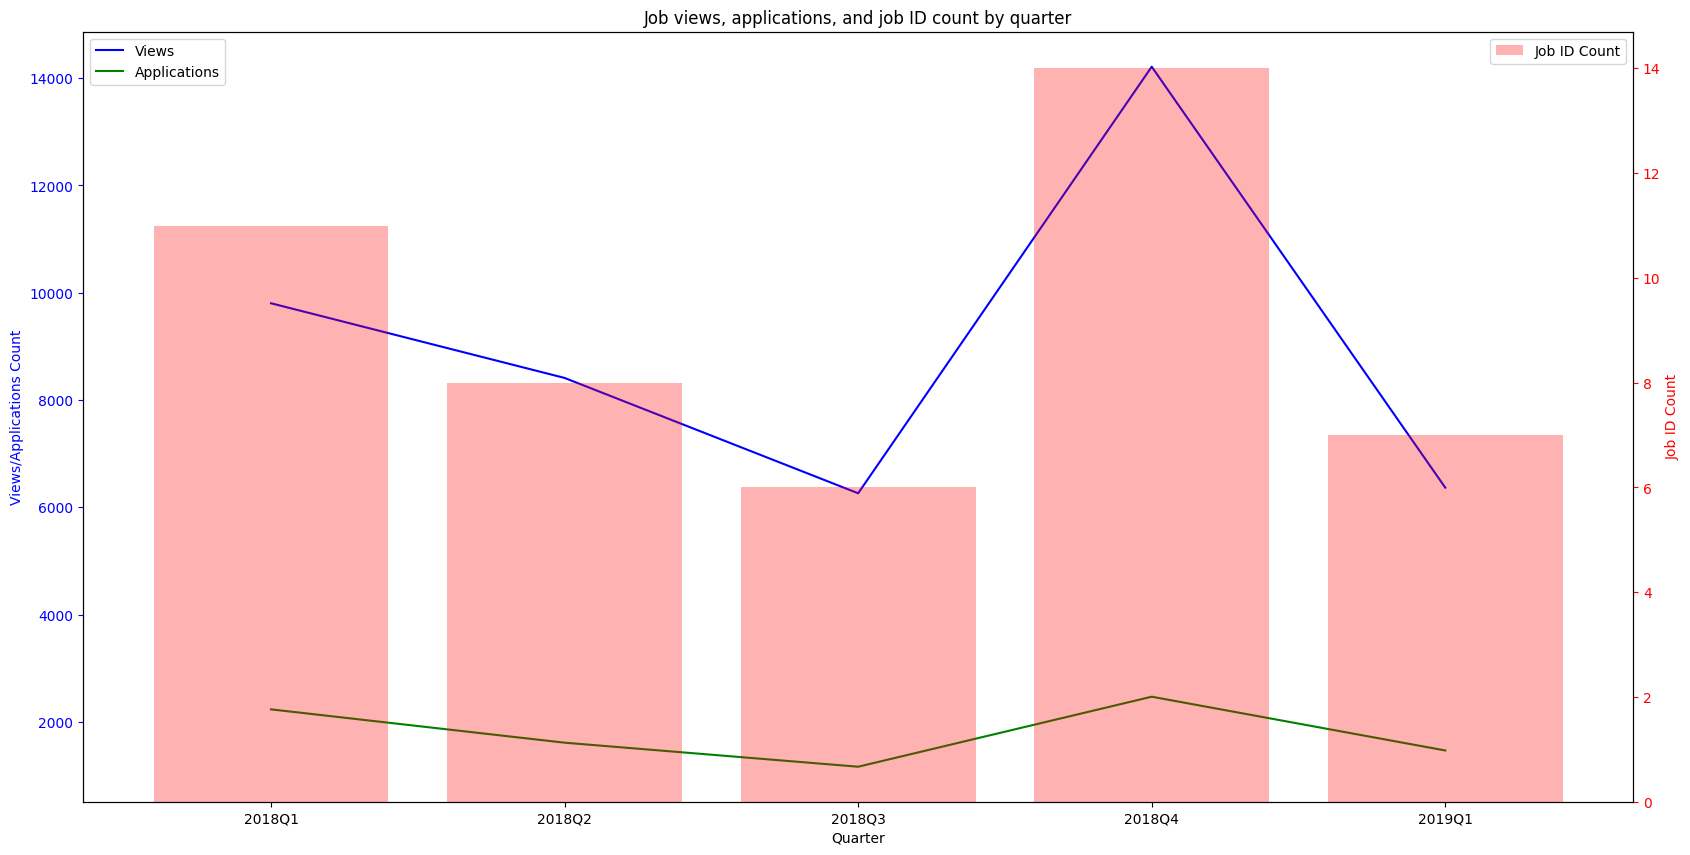

########## Asia Pacific - IT ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,16,609723,15478,3475,0.224512,217.187500
1,2018Q2,7,395737,7347,1421,0.193412,203.000000
2,2018Q3,4,136303,3280,680,0.207317,170.000000
3,2018Q4,12,497564,11653,2527,0.216854,210.583333
4,2019Q1,12,569048,9847,2401,0.243831,200.083333


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,10.200000,441675.000000,9521.00000,2100.800000,0.217185,200.170833
std,4.711688,189043.612681,4577.49675,1077.148179,0.018883,18.140274
min,4.000000,136303.000000,3280.00000,680.000000,0.193412,170.000000
25%,7.000000,395737.000000,7347.00000,1421.000000,0.207317,200.083333
50%,12.000000,497564.000000,9847.00000,2401.000000,0.216854,203.000000
75%,12.000000,569048.000000,11653.00000,2527.000000,0.224512,210.583333
max,16.000000,609723.000000,15478.00000,3475.000000,0.243831,217.187500


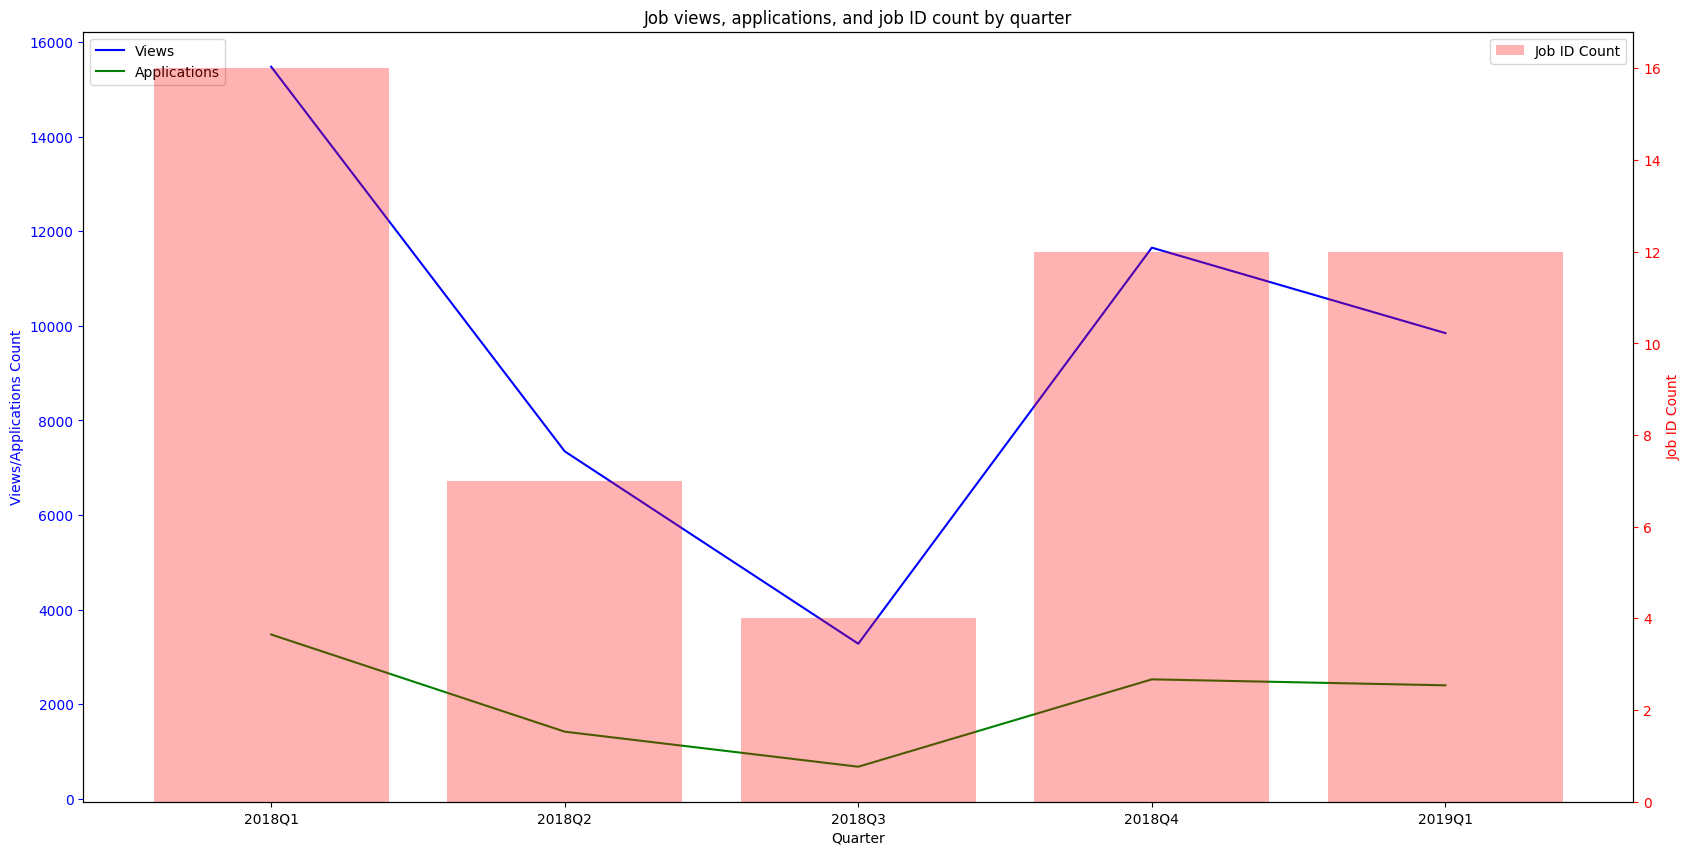

########## Asia Pacific - Human Resources ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,10,492196,10784,1776,0.164688,177.600000
1,2018Q2,12,561371,13221,2891,0.218667,240.916667
2,2018Q3,5,272417,5128,823,0.160491,164.600000
3,2018Q4,8,343361,7491,1599,0.213456,199.875000
4,2019Q1,10,371003,7596,2113,0.278173,211.300000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,9.000000,408069.60000,8844.000000,1840.400000,0.207095,198.858333
std,2.645751,116770.43082,3166.958241,754.253803,0.047950,29.792122
min,5.000000,272417.00000,5128.000000,823.000000,0.160491,164.600000
25%,8.000000,343361.00000,7491.000000,1599.000000,0.164688,177.600000
50%,10.000000,371003.00000,7596.000000,1776.000000,0.213456,199.875000
75%,10.000000,492196.00000,10784.000000,2113.000000,0.218667,211.300000
max,12.000000,561371.00000,13221.000000,2891.000000,0.278173,240.916667


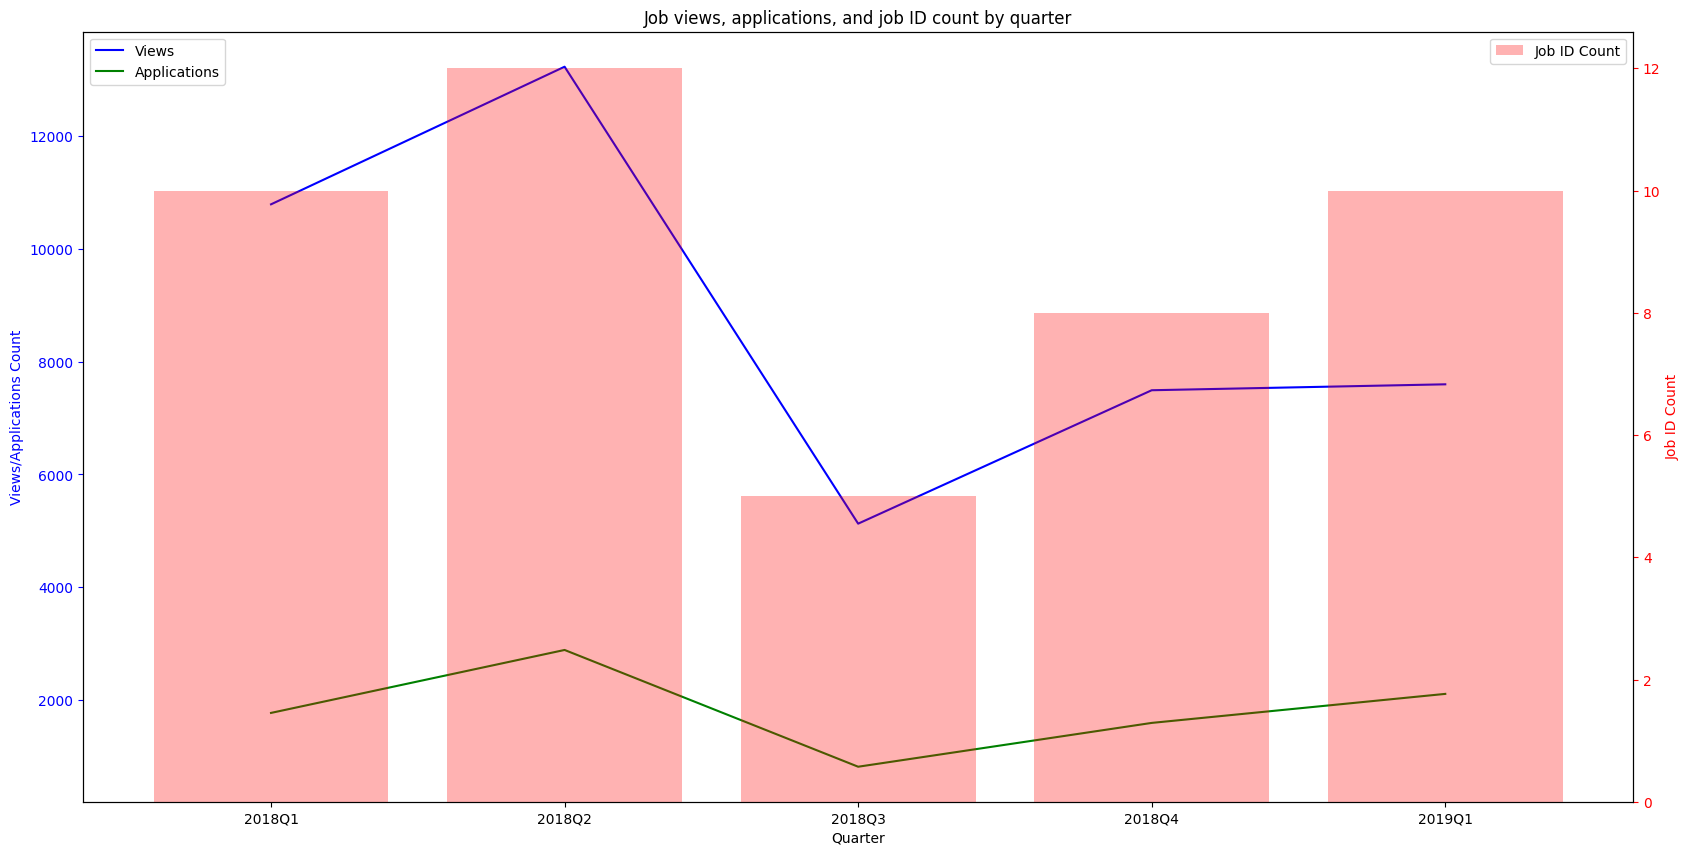

########## Asia Pacific - Support ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,6,261294,6477,1274,0.196696,212.333333
1,2018Q2,9,415416,8306,1490,0.179388,165.555556
2,2018Q3,11,429575,12230,2071,0.169338,188.272727
3,2018Q4,7,298982,7916,1515,0.191385,216.428571
4,2019Q1,5,302964,6101,922,0.151123,184.400000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,7.600000,341646.200000,8206.000000,1454.40000,0.177586,193.398038
std,2.408319,75740.477726,2434.499024,418.66729,0.018215,21.043931
min,5.000000,261294.000000,6101.000000,922.00000,0.151123,165.555556
25%,6.000000,298982.000000,6477.000000,1274.00000,0.169338,184.400000
50%,7.000000,302964.000000,7916.000000,1490.00000,0.179388,188.272727
75%,9.000000,415416.000000,8306.000000,1515.00000,0.191385,212.333333
max,11.000000,429575.000000,12230.000000,2071.00000,0.196696,216.428571


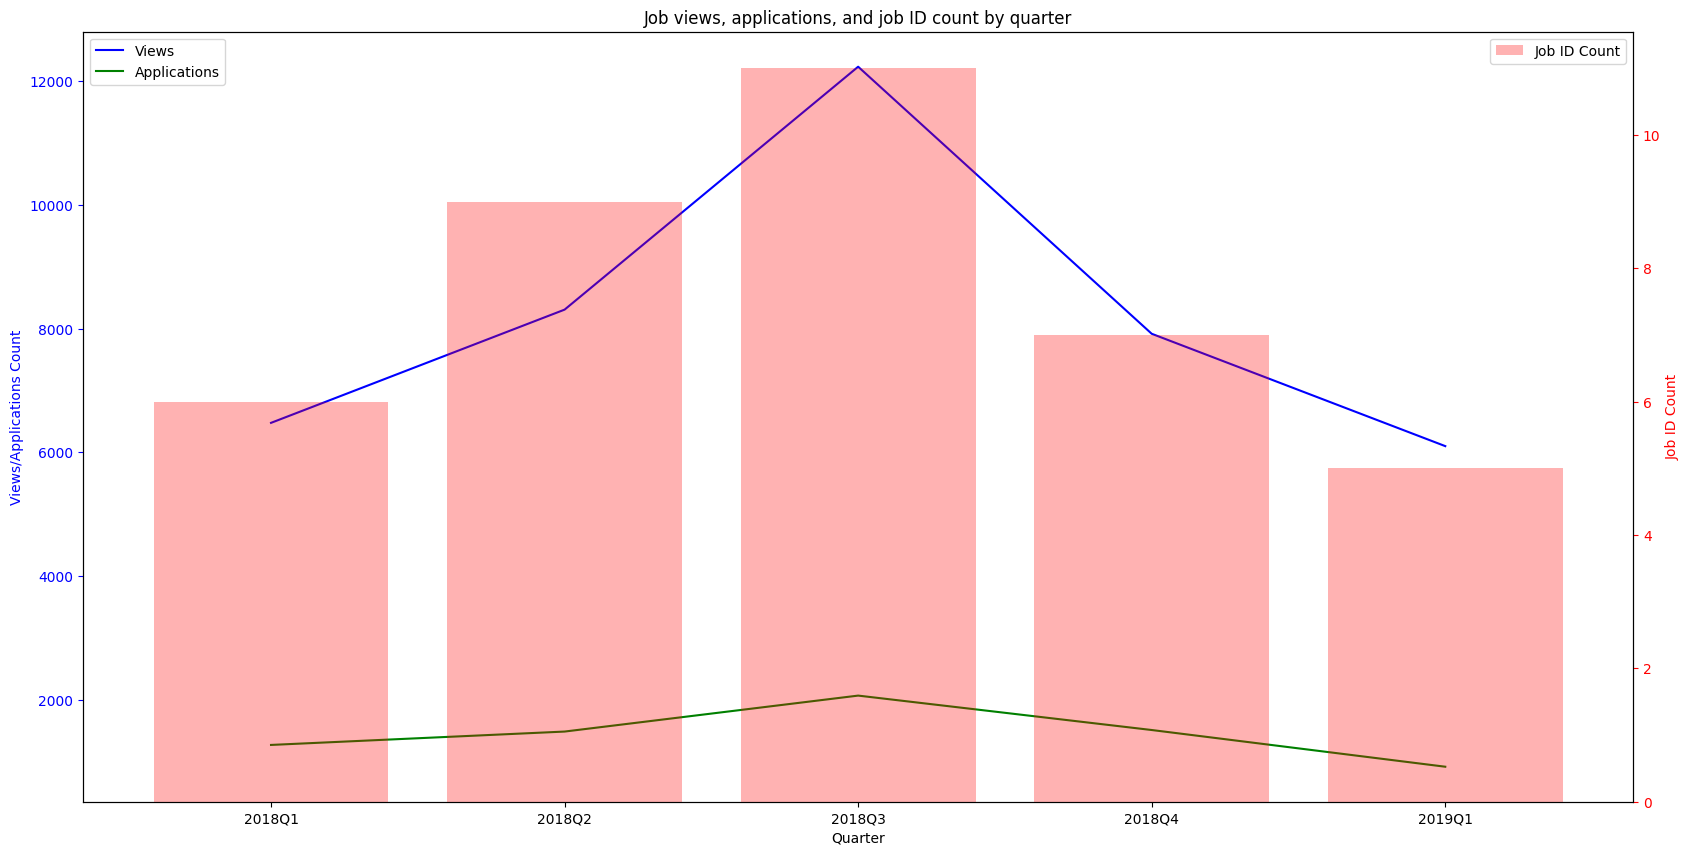

########## Latin America - Marketing ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,6,239438,6580,1214,0.184498,202.333333
1,2018Q2,7,369446,6209,1373,0.221131,196.142857
2,2018Q3,11,344903,11289,2313,0.204890,210.272727
3,2018Q4,17,824094,16181,3062,0.189234,180.117647
4,2019Q1,13,606836,13221,2701,0.204296,207.769231


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000
mean,10.800000,476943.400000,10696.00000,2132.60000,0.200810,199.327159
std,4.494441,236000.423667,4297.88099,812.43849,0.014507,12.033871
min,6.000000,239438.000000,6209.00000,1214.00000,0.184498,180.117647
25%,7.000000,344903.000000,6580.00000,1373.00000,0.189234,196.142857
50%,11.000000,369446.000000,11289.00000,2313.00000,0.204296,202.333333
75%,13.000000,606836.000000,13221.00000,2701.00000,0.204890,207.769231
max,17.000000,824094.000000,16181.00000,3062.00000,0.221131,210.272727


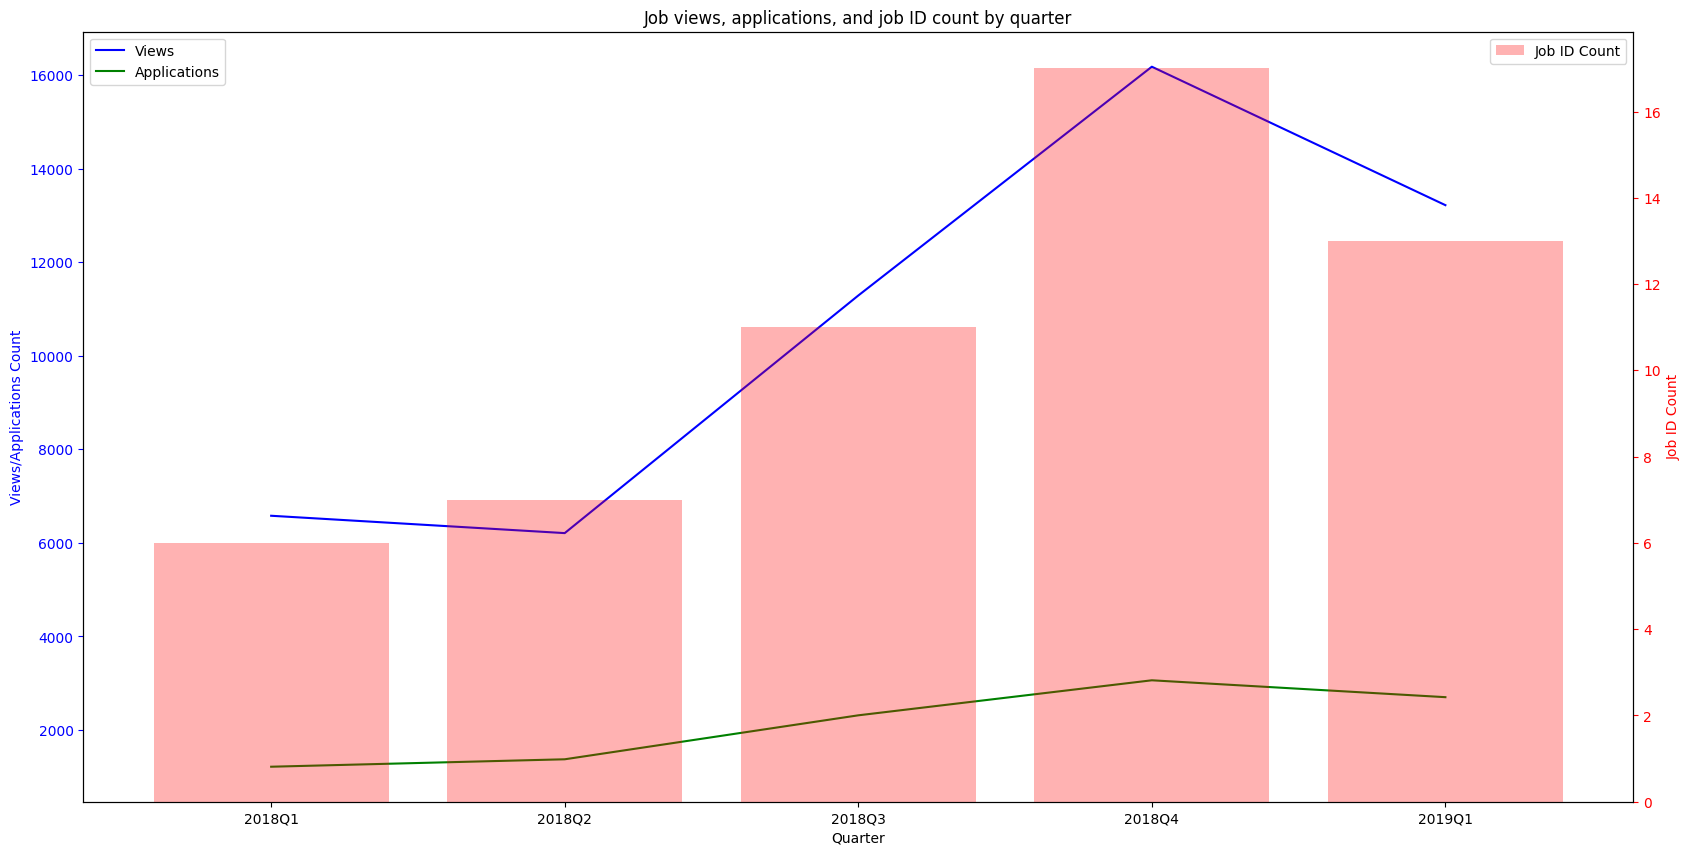

########## Latin America - Operations ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,12,575718,12584,2383,0.189367,198.583333
1,2018Q2,6,224240,6282,1297,0.206463,216.166667
2,2018Q3,12,597317,10663,2463,0.230986,205.250000
3,2018Q4,11,594997,9567,2216,0.231630,201.454545
4,2019Q1,9,353127,10400,2076,0.199615,230.666667


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000
mean,10.00000,469079.80000,9899.20000,2087.000000,0.211612,210.424242
std,2.54951,171072.50357,2304.17202,466.329819,0.018982,13.135511
min,6.00000,224240.00000,6282.00000,1297.000000,0.189367,198.583333
25%,9.00000,353127.00000,9567.00000,2076.000000,0.199615,201.454545
50%,11.00000,575718.00000,10400.00000,2216.000000,0.206463,205.250000
75%,12.00000,594997.00000,10663.00000,2383.000000,0.230986,216.166667
max,12.00000,597317.00000,12584.00000,2463.000000,0.231630,230.666667


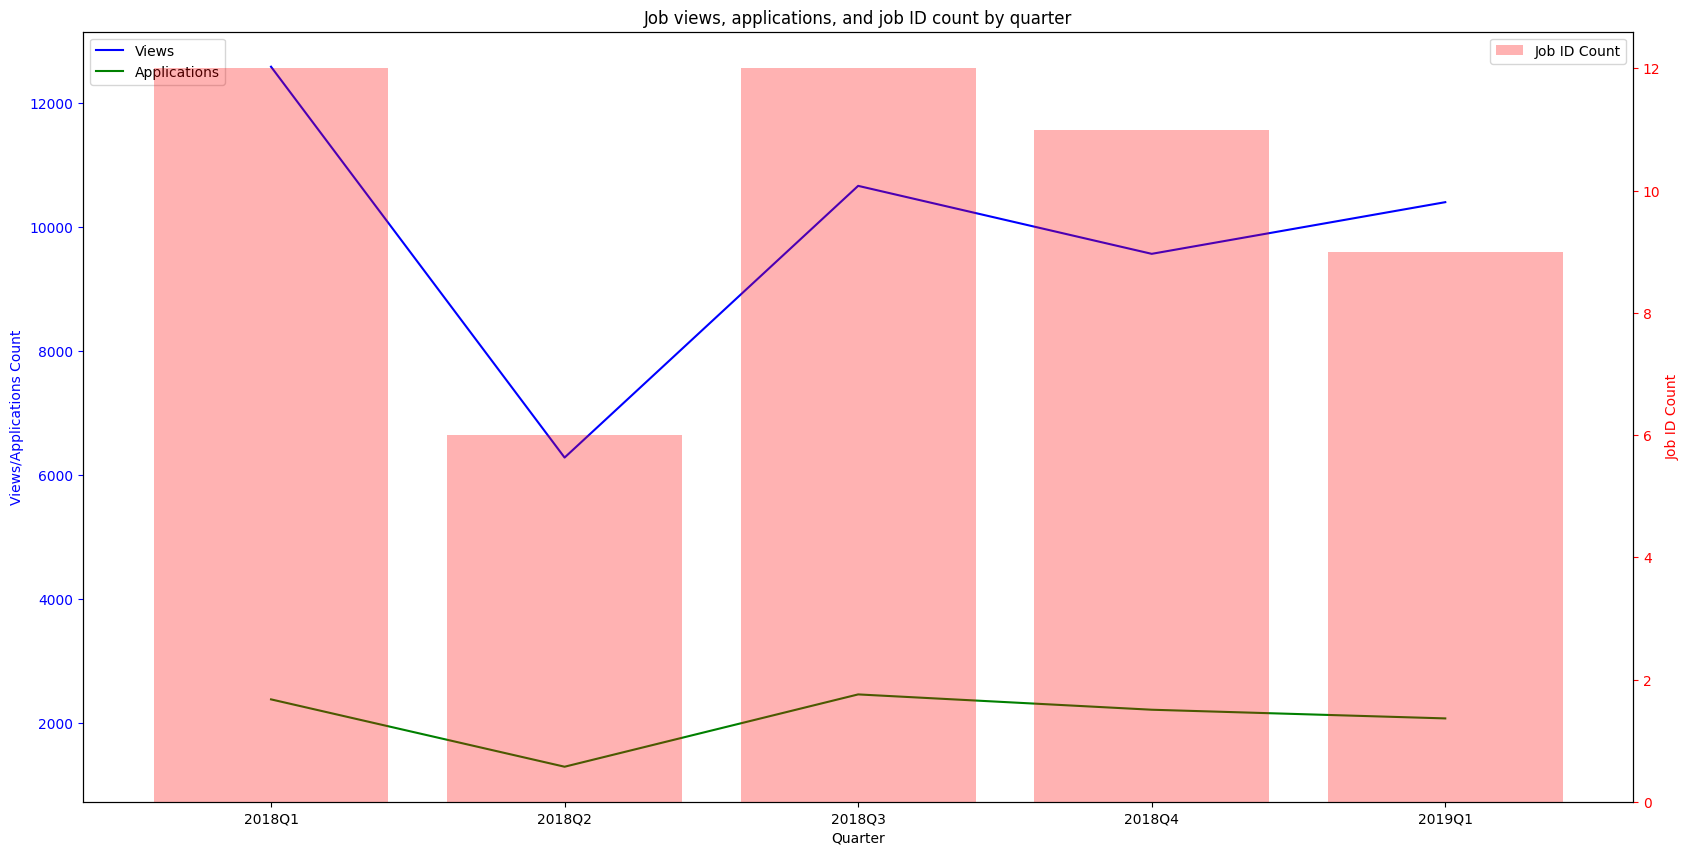

########## Latin America - Engineering ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,13,674258,12255,2602,0.212322,200.153846
1,2018Q2,7,284860,7638,1301,0.170333,185.857143
2,2018Q3,4,225128,3676,1055,0.286997,263.750000
3,2018Q4,16,788017,14842,3124,0.210484,195.250000
4,2019Q1,7,329085,6270,1185,0.188995,169.285714


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.400000,460269.600000,8936.200000,1853.400000,0.213826,202.859341
std,4.929503,253218.725927,4537.525669,943.950899,0.044372,36.017903
min,4.000000,225128.000000,3676.000000,1055.000000,0.170333,169.285714
25%,7.000000,284860.000000,6270.000000,1185.000000,0.188995,185.857143
50%,7.000000,329085.000000,7638.000000,1301.000000,0.210484,195.250000
75%,13.000000,674258.000000,12255.000000,2602.000000,0.212322,200.153846
max,16.000000,788017.000000,14842.000000,3124.000000,0.286997,263.750000


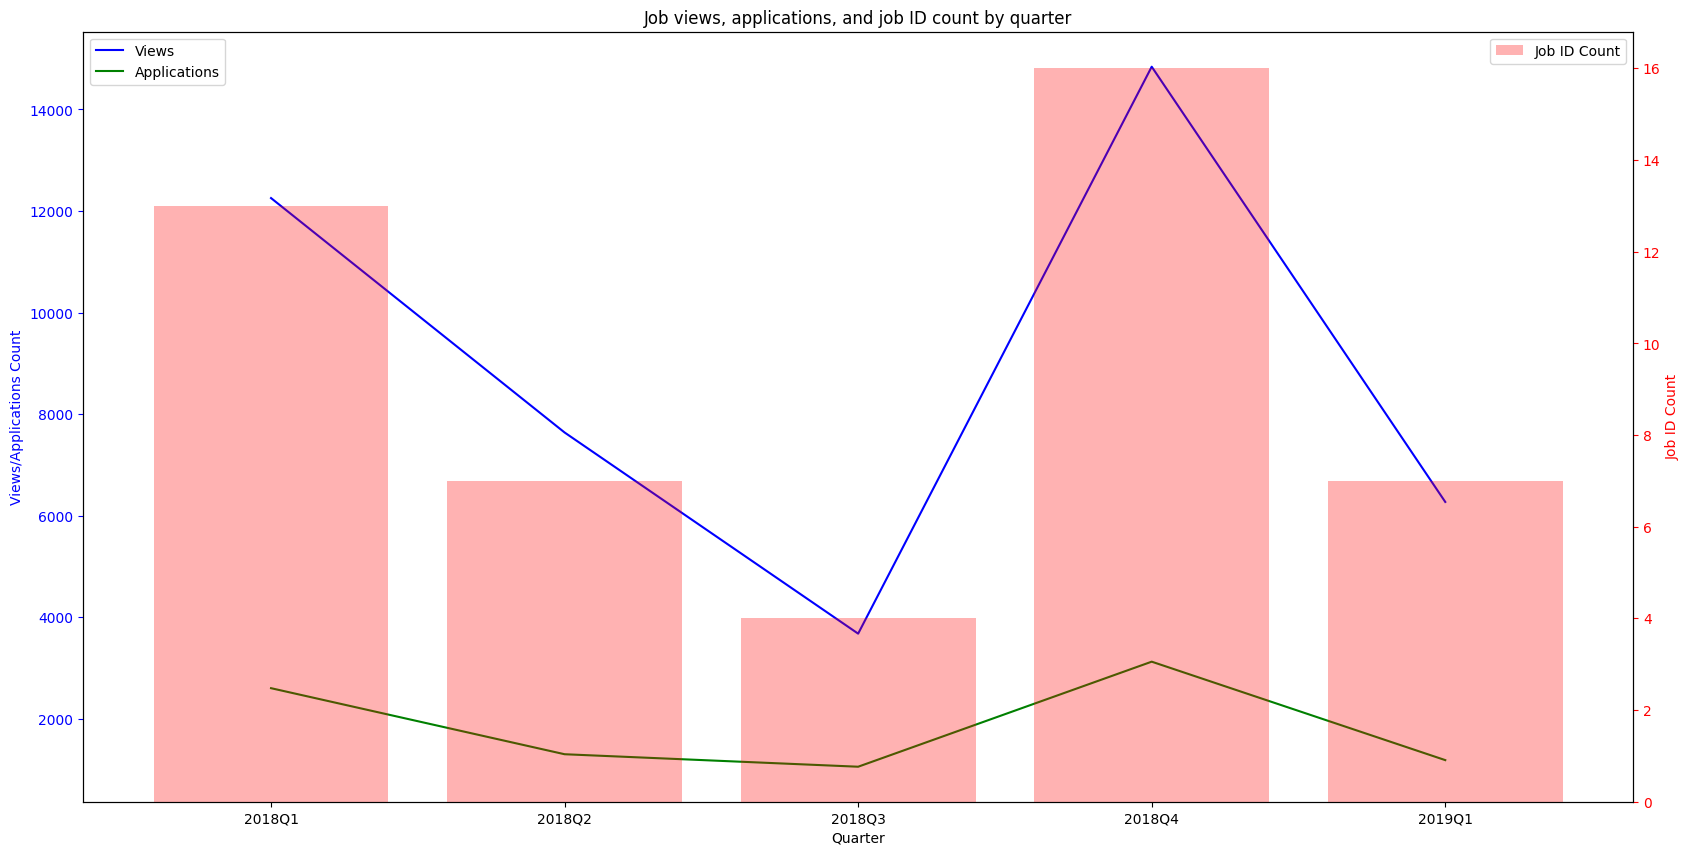

########## Latin America - Finance ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,14,673352,12567,2822,0.224556,201.571429
1,2018Q2,10,456329,8710,2031,0.233180,203.100000
2,2018Q3,6,340634,6744,1218,0.180605,203.000000
3,2018Q4,7,354642,7816,1535,0.196392,219.285714
4,2019Q1,6,232175,5978,990,0.165607,165.000000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.600000,411426.400000,8363.000000,1719.200000,0.200068,198.391429
std,3.435113,166574.577746,2569.173992,729.768936,0.028618,20.031729
min,6.000000,232175.000000,5978.000000,990.000000,0.165607,165.000000
25%,6.000000,340634.000000,6744.000000,1218.000000,0.180605,201.571429
50%,7.000000,354642.000000,7816.000000,1535.000000,0.196392,203.000000
75%,10.000000,456329.000000,8710.000000,2031.000000,0.224556,203.100000
max,14.000000,673352.000000,12567.000000,2822.000000,0.233180,219.285714


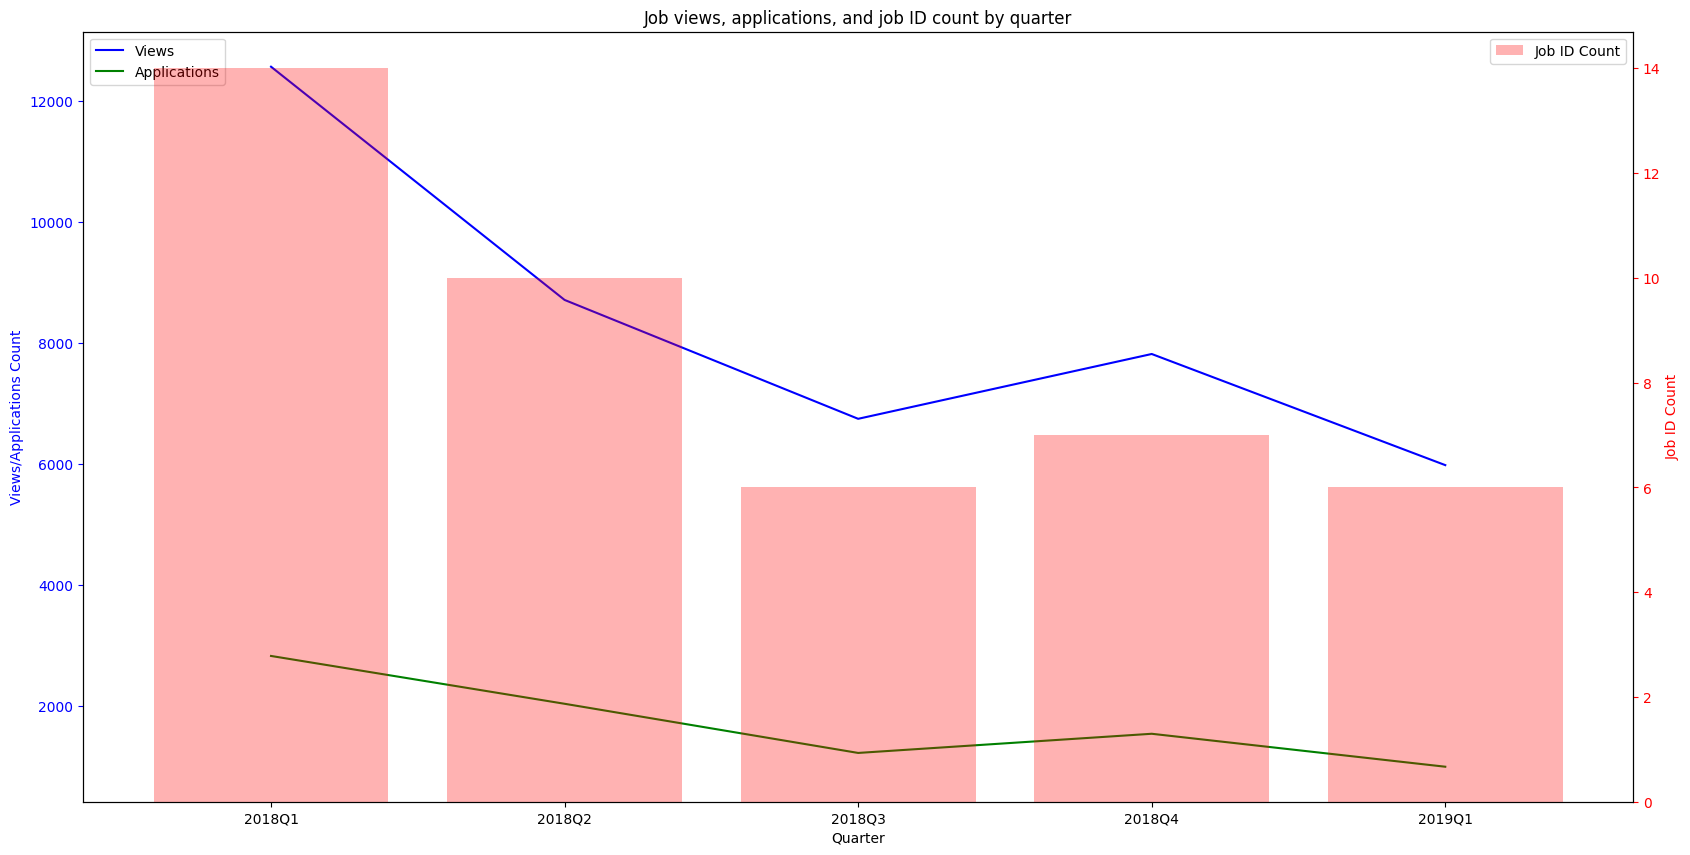

########## Latin America - Sales ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,6,219832,6083,1261,0.207299,210.166667
1,2018Q2,13,549190,14740,2858,0.193894,219.846154
2,2018Q3,10,555326,11154,1844,0.165322,184.400000
3,2018Q4,11,566155,10701,2152,0.201103,195.636364
4,2019Q1,8,396156,7978,1482,0.185761,185.250000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.600000,457331.800000,10131.200000,1919.400000,0.190676,199.059837
std,2.701851,150026.593063,3302.878396,625.613139,0.016297,15.594672
min,6.000000,219832.000000,6083.000000,1261.000000,0.165322,184.400000
25%,8.000000,396156.000000,7978.000000,1482.000000,0.185761,185.250000
50%,10.000000,549190.000000,10701.000000,1844.000000,0.193894,195.636364
75%,11.000000,555326.000000,11154.000000,2152.000000,0.201103,210.166667
max,13.000000,566155.000000,14740.000000,2858.000000,0.207299,219.846154


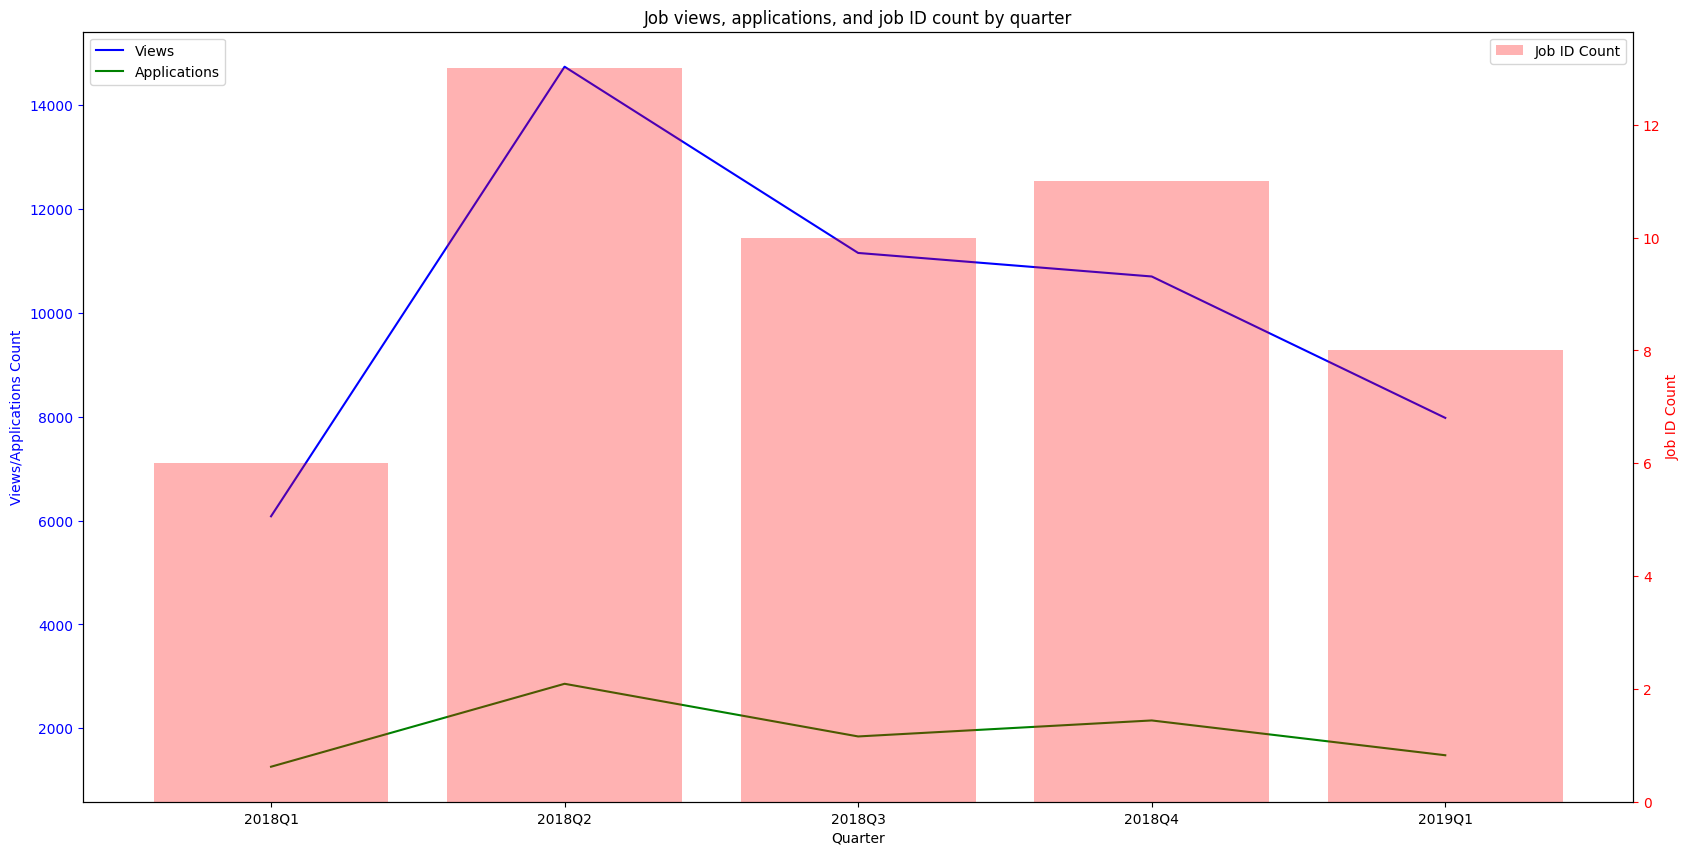

########## Latin America - IT ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,8,270657,7820,1682,0.215090,210.250000
1,2018Q2,8,322255,8345,1772,0.212343,221.500000
2,2018Q3,6,270772,5535,1272,0.229810,212.000000
3,2018Q4,13,511498,11696,2423,0.207165,186.384615
4,2019Q1,6,283015,5238,1364,0.260405,227.333333


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.200000,331639.400000,7726.800000,1702.600000,0.224962,211.493590
std,2.863564,102743.866879,2604.972111,453.950218,0.021524,15.678722
min,6.000000,270657.000000,5238.000000,1272.000000,0.207165,186.384615
25%,6.000000,270772.000000,5535.000000,1364.000000,0.212343,210.250000
50%,8.000000,283015.000000,7820.000000,1682.000000,0.215090,212.000000
75%,8.000000,322255.000000,8345.000000,1772.000000,0.229810,221.500000
max,13.000000,511498.000000,11696.000000,2423.000000,0.260405,227.333333


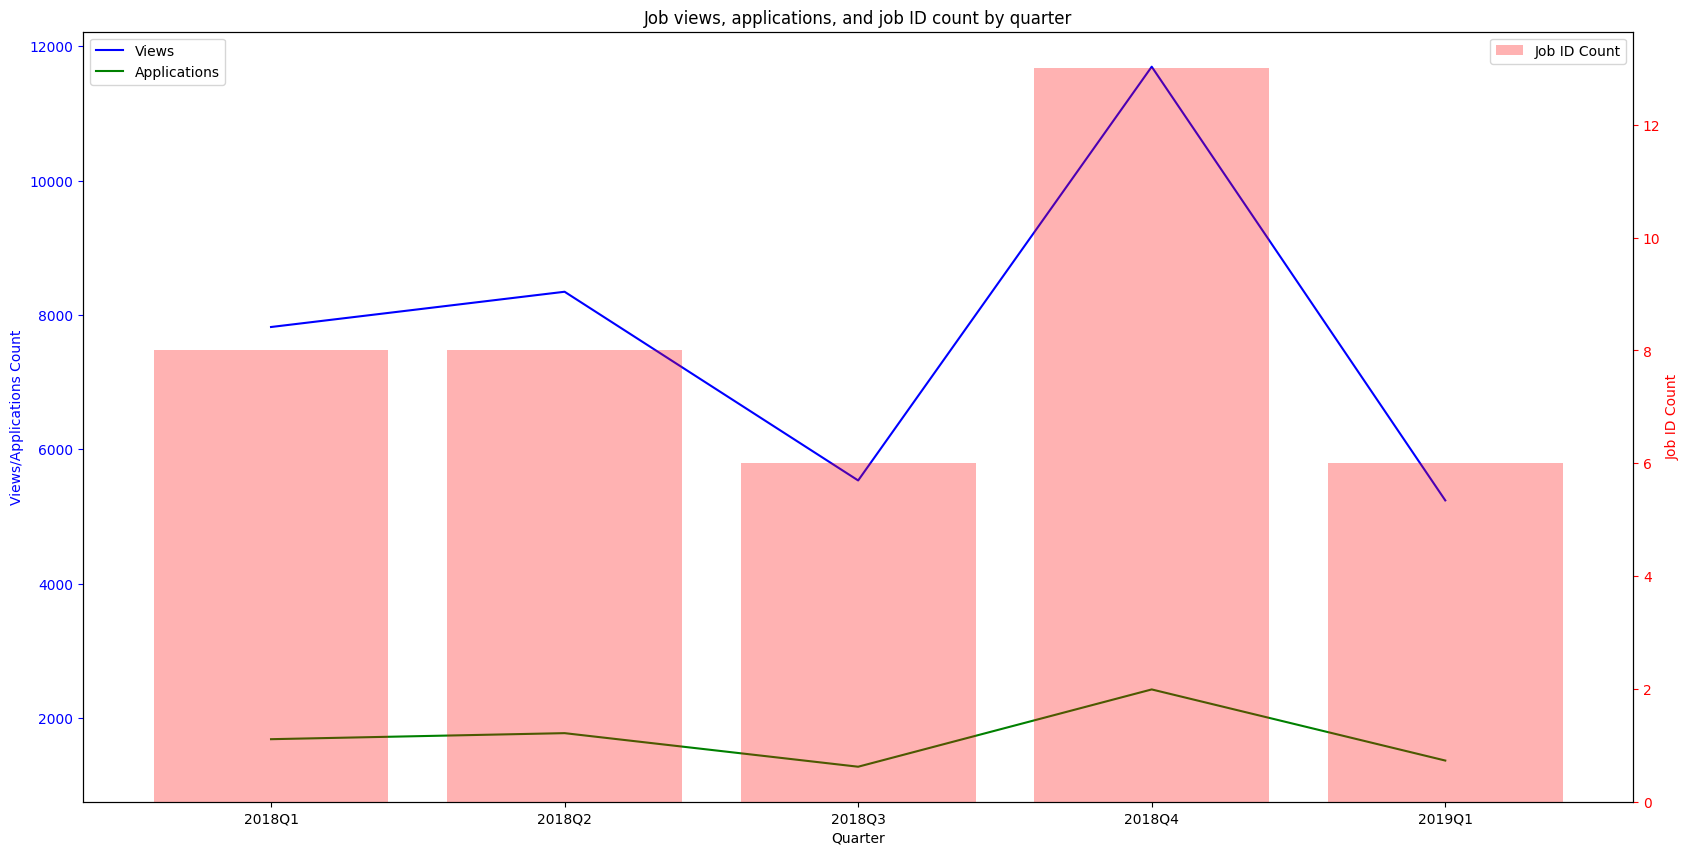

########## Latin America - Human Resources ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,9,443677,8751,1674,0.191292,186.000000
1,2018Q2,11,573344,11237,2429,0.216161,220.818182
2,2018Q3,5,164073,4780,1041,0.217782,208.200000
3,2018Q4,18,802337,18363,3392,0.184719,188.444444
4,2019Q1,10,399782,11214,2006,0.178884,200.600000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10.600000,476642.600000,10869.000000,2108.400000,0.197768,200.812525
std,4.722288,234585.826731,4949.149674,878.769765,0.018081,14.380773
min,5.000000,164073.000000,4780.000000,1041.000000,0.178884,186.000000
25%,9.000000,399782.000000,8751.000000,1674.000000,0.184719,188.444444
50%,10.000000,443677.000000,11214.000000,2006.000000,0.191292,200.600000
75%,11.000000,573344.000000,11237.000000,2429.000000,0.216161,208.200000
max,18.000000,802337.000000,18363.000000,3392.000000,0.217782,220.818182


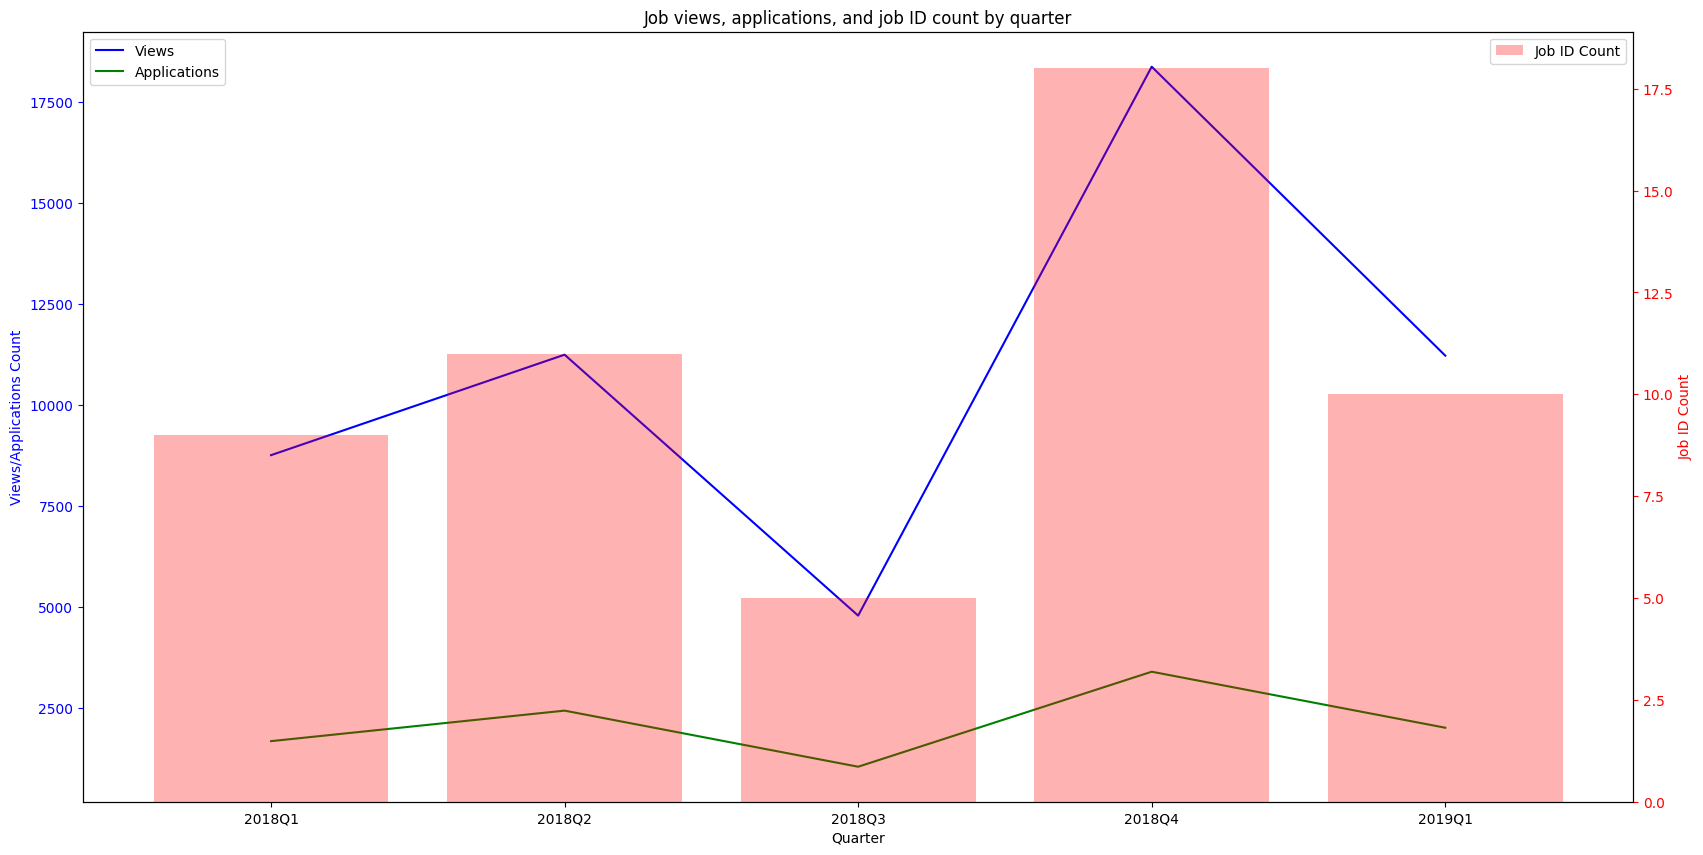

########## Latin America - Support ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,17,823875,15725,3294,0.209475,193.764706
1,2018Q2,7,333542,7256,1574,0.216924,224.857143
2,2018Q3,10,320546,9360,2040,0.217949,204.000000
3,2018Q4,9,370462,9852,1937,0.196610,215.222222
4,2019Q1,6,245693,4652,1275,0.274076,212.500000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.80000,418823.600000,9369.000000,2024.000000,0.223007,210.068814
std,4.32435,230928.085999,4103.259802,772.046955,0.029793,11.766663
min,6.00000,245693.000000,4652.000000,1275.000000,0.196610,193.764706
25%,7.00000,320546.000000,7256.000000,1574.000000,0.209475,204.000000
50%,9.00000,333542.000000,9360.000000,1937.000000,0.216924,212.500000
75%,10.00000,370462.000000,9852.000000,2040.000000,0.217949,215.222222
max,17.00000,823875.000000,15725.000000,3294.000000,0.274076,224.857143


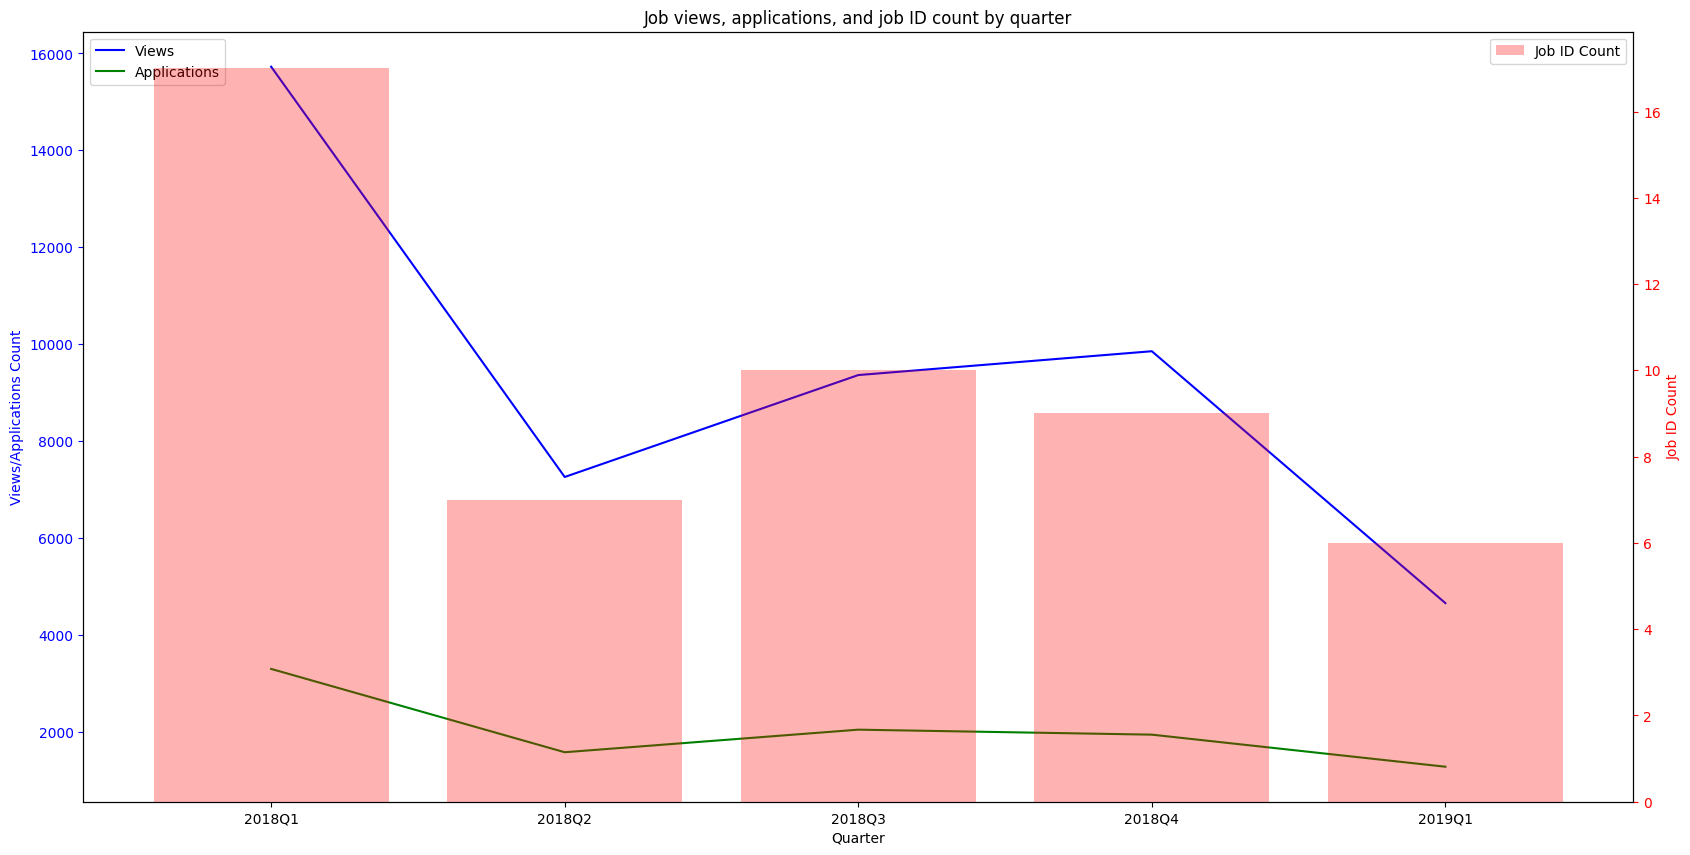

########## Europe - Marketing ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,8,366845,8094,1480,0.182851,185.000000
1,2018Q2,8,424075,7818,1601,0.204784,200.125000
2,2018Q3,13,519605,11768,2575,0.218814,198.076923
3,2018Q4,16,646242,17467,3057,0.175016,191.062500
4,2019Q1,12,445190,13623,2487,0.182559,207.250000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,11.400000,480391.400000,11754.00000,2240.000000,0.192805,196.302885
std,3.435113,107642.450234,4031.73108,675.766972,0.018306,8.555874
min,8.000000,366845.000000,7818.00000,1480.000000,0.175016,185.000000
25%,8.000000,424075.000000,8094.00000,1601.000000,0.182559,191.062500
50%,12.000000,445190.000000,11768.00000,2487.000000,0.182851,198.076923
75%,13.000000,519605.000000,13623.00000,2575.000000,0.204784,200.125000
max,16.000000,646242.000000,17467.00000,3057.000000,0.218814,207.250000


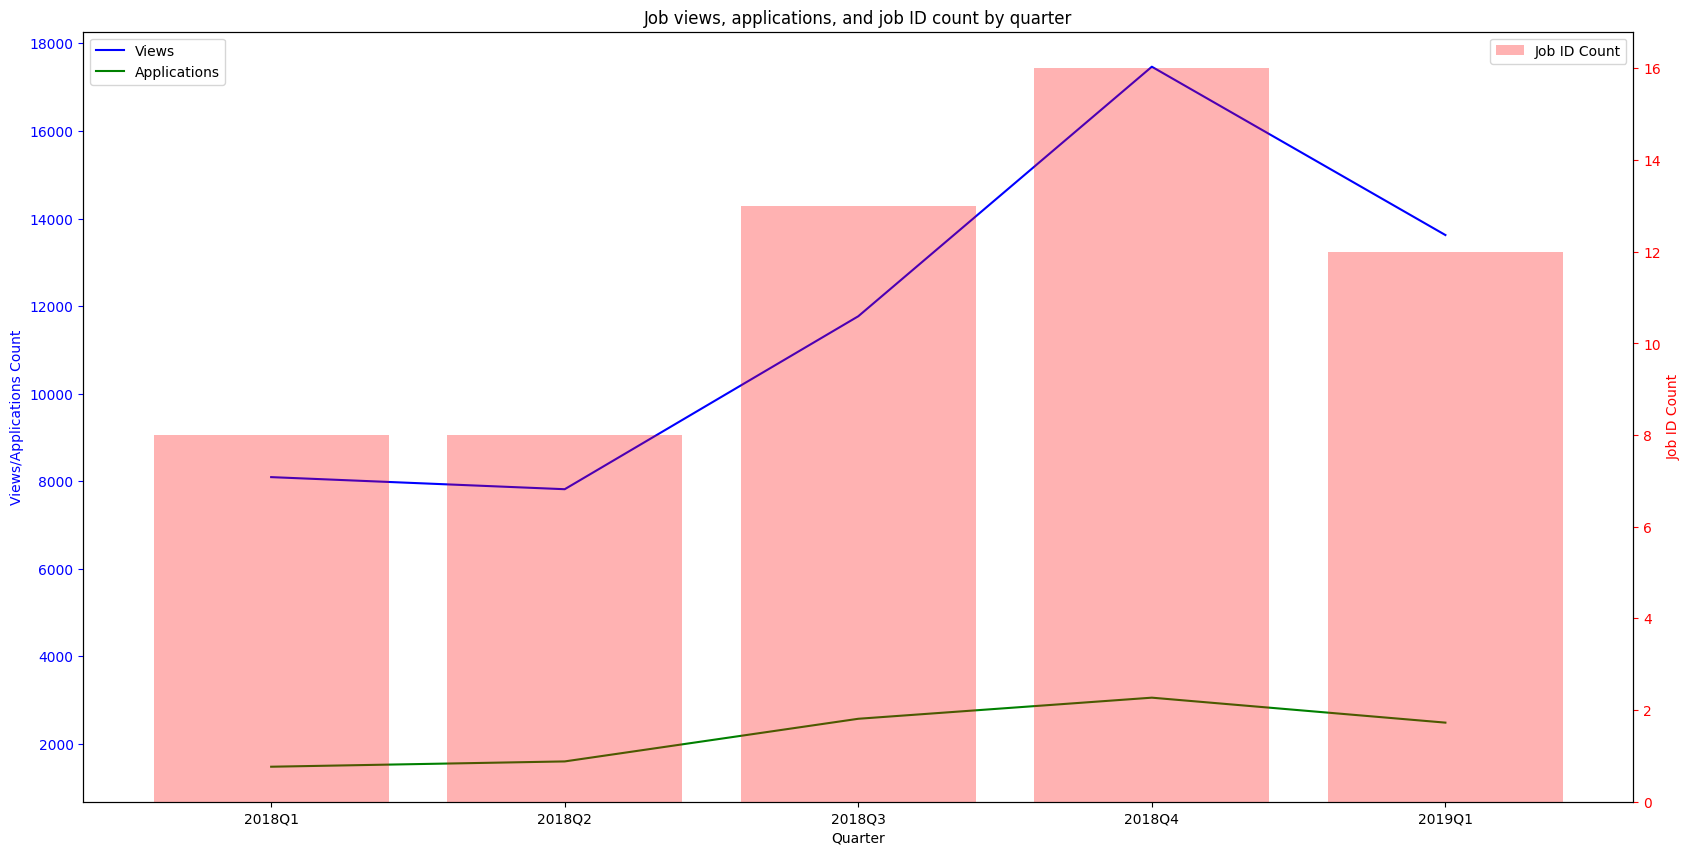

########## Europe - Operations ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,11,479795,9567,2083,0.217728,189.363636
1,2018Q2,4,89763,4951,738,0.149061,184.500000
2,2018Q3,8,345435,9061,1689,0.186403,211.125000
3,2018Q4,15,870558,16328,2864,0.175404,190.933333
4,2019Q1,6,288118,5797,1355,0.233742,225.833333


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.80000,414733.800000,9140.800000,1745.800000,0.192467,200.351061
std,4.32435,290881.662534,4488.298141,796.191999,0.033741,17.507835
min,4.00000,89763.000000,4951.000000,738.000000,0.149061,184.500000
25%,6.00000,288118.000000,5797.000000,1355.000000,0.175404,189.363636
50%,8.00000,345435.000000,9061.000000,1689.000000,0.186403,190.933333
75%,11.00000,479795.000000,9567.000000,2083.000000,0.217728,211.125000
max,15.00000,870558.000000,16328.000000,2864.000000,0.233742,225.833333


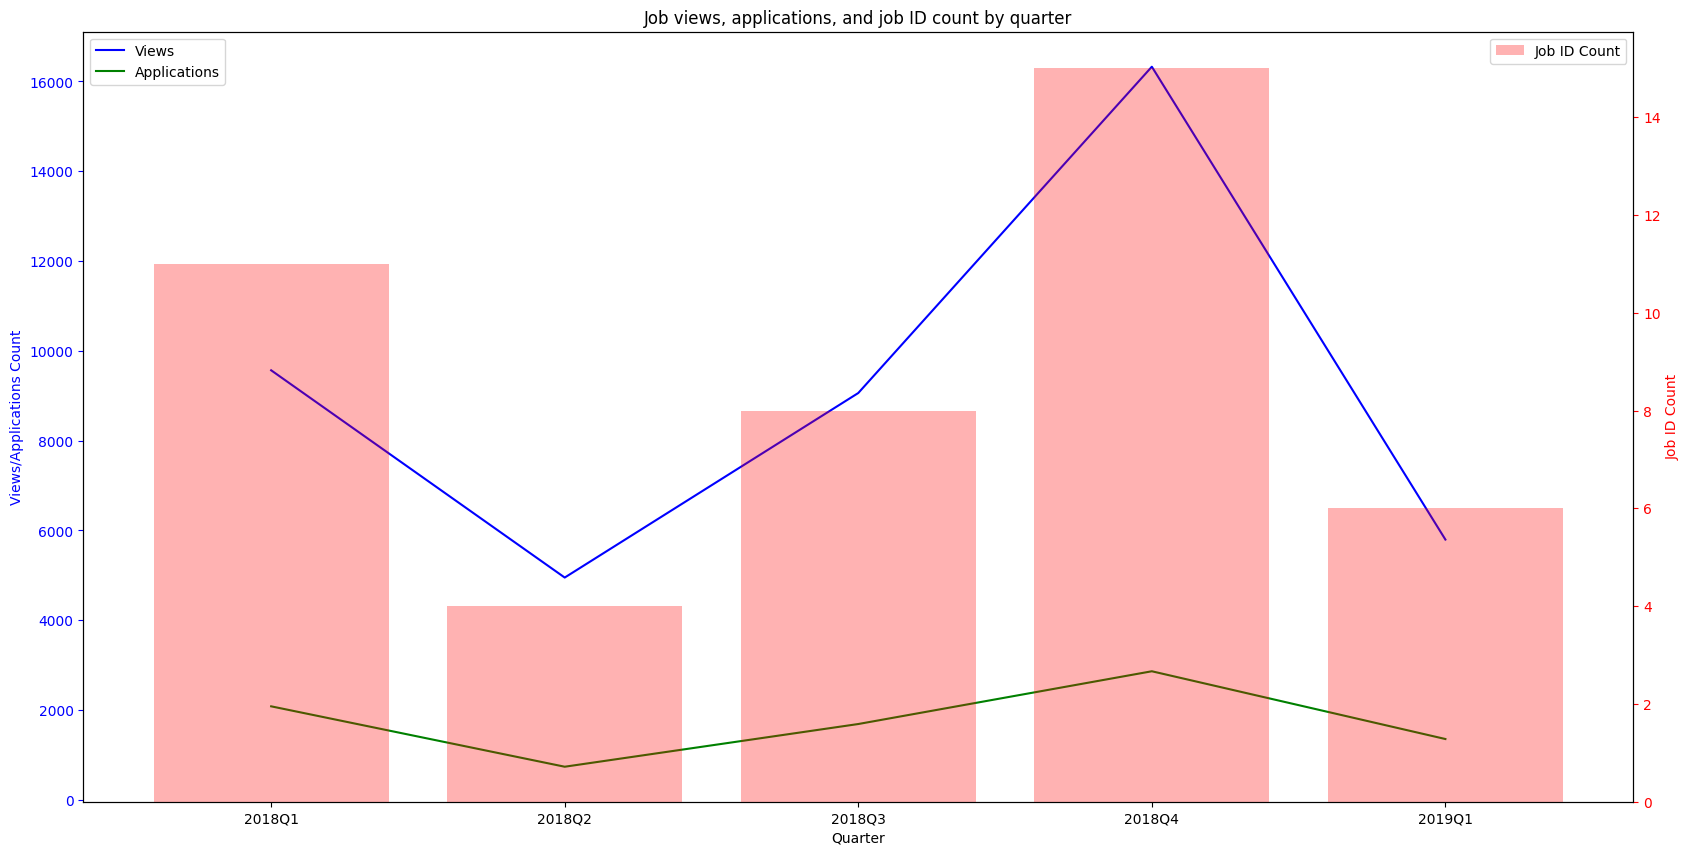

########## Europe - Engineering ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,10,442074,8550,2302,0.269240,230.200000
1,2018Q2,8,393792,7366,1323,0.179609,165.375000
2,2018Q3,5,289412,4477,1098,0.245254,219.600000
3,2018Q4,11,556787,10597,2364,0.223082,214.909091
4,2019Q1,9,403747,8494,1661,0.195550,184.555556


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.600000,417162.400000,7896.800000,1749.600000,0.222547,202.927929
std,2.302173,96387.149031,2238.927131,569.441217,0.036293,26.986286
min,5.000000,289412.000000,4477.000000,1098.000000,0.179609,165.375000
25%,8.000000,393792.000000,7366.000000,1323.000000,0.195550,184.555556
50%,9.000000,403747.000000,8494.000000,1661.000000,0.223082,214.909091
75%,10.000000,442074.000000,8550.000000,2302.000000,0.245254,219.600000
max,11.000000,556787.000000,10597.000000,2364.000000,0.269240,230.200000


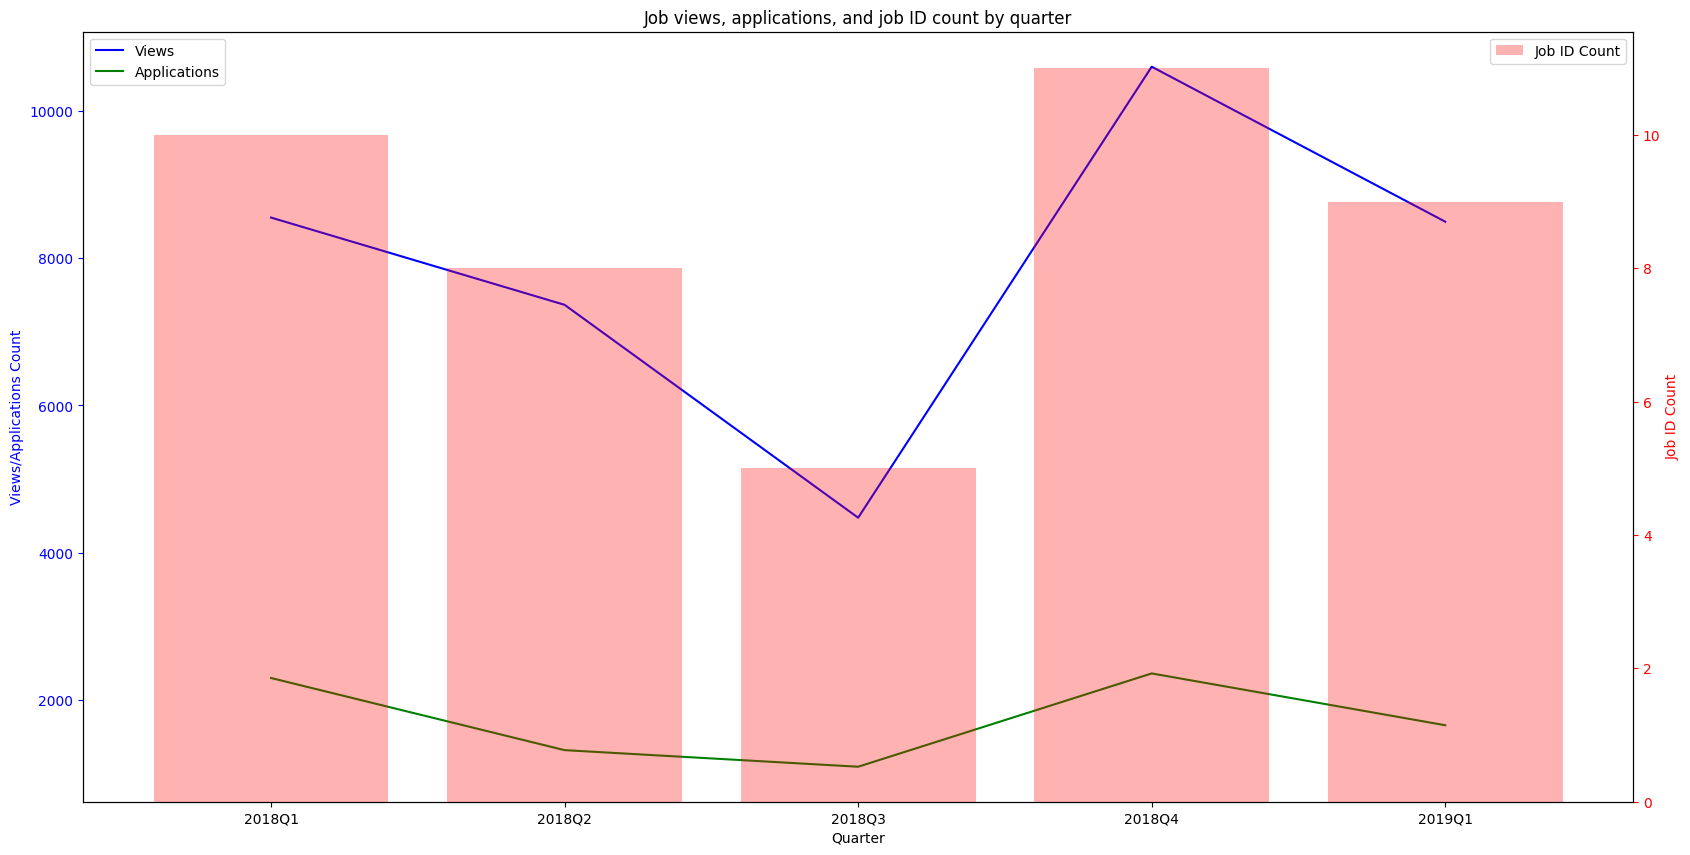

########## Europe - Finance ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,13,599068,12639,2461,0.194715,189.307692
1,2018Q2,7,407491,7404,1649,0.222717,235.571429
2,2018Q3,10,440908,9809,2054,0.209400,205.400000
3,2018Q4,11,438642,11386,2063,0.181187,187.545455
4,2019Q1,5,181924,4639,1031,0.222246,206.200000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,9.200000,413606.600000,9175.400000,1851.60000,0.206053,204.804915
std,3.193744,149567.958042,3201.621043,541.16892,0.018014,19.280376
min,5.000000,181924.000000,4639.000000,1031.00000,0.181187,187.545455
25%,7.000000,407491.000000,7404.000000,1649.00000,0.194715,189.307692
50%,10.000000,438642.000000,9809.000000,2054.00000,0.209400,205.400000
75%,11.000000,440908.000000,11386.000000,2063.00000,0.222246,206.200000
max,13.000000,599068.000000,12639.000000,2461.00000,0.222717,235.571429


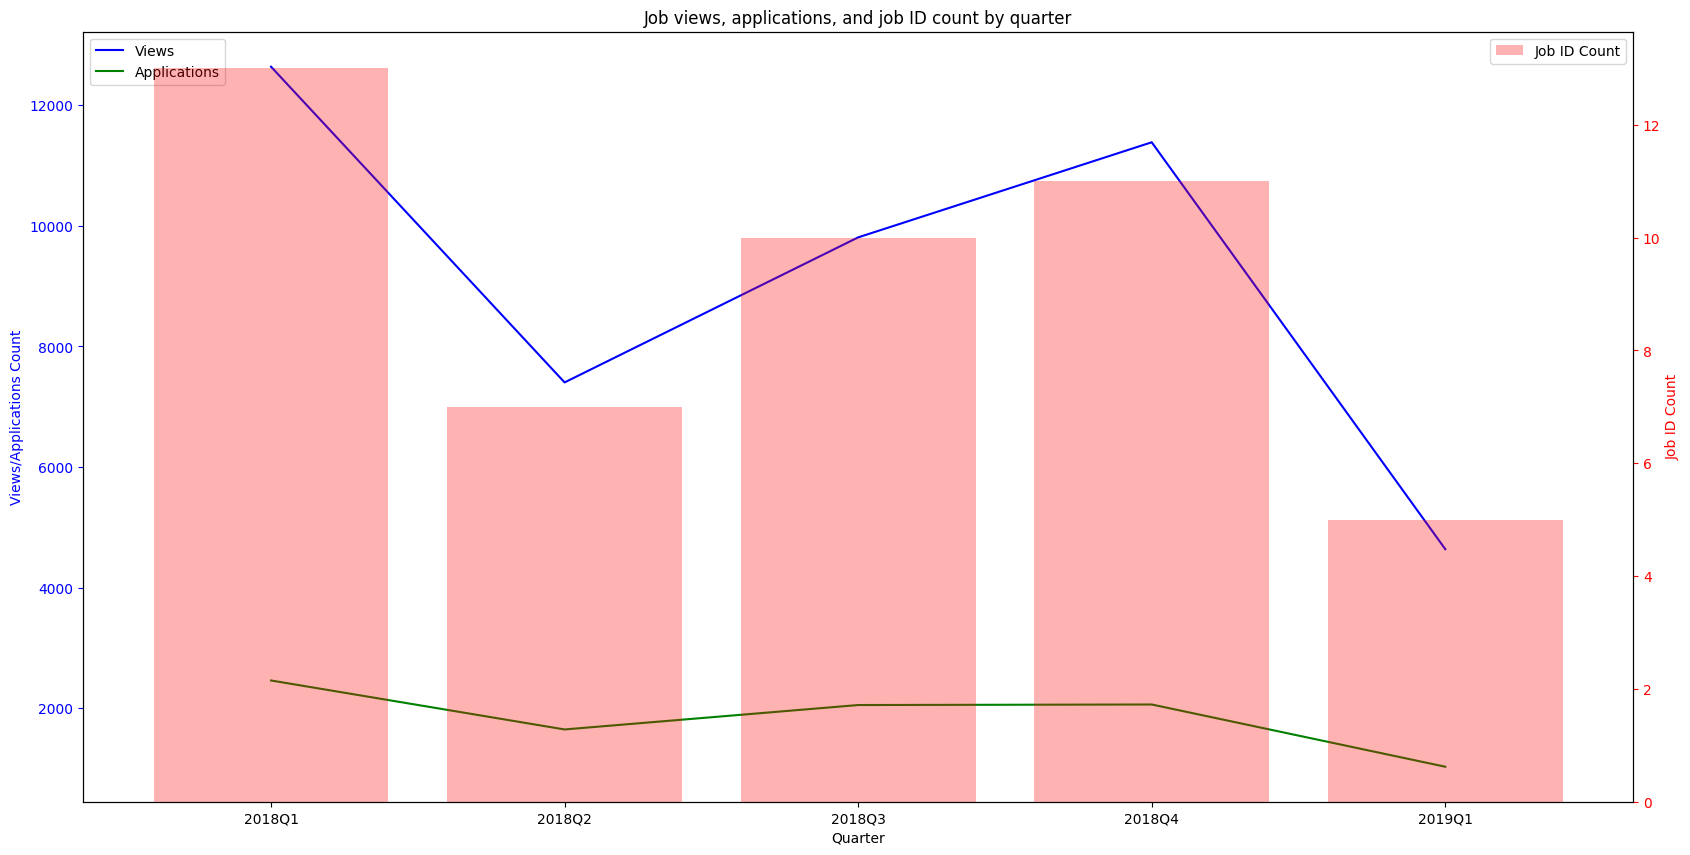

########## Europe - Sales ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,9,397413,10213,1768,0.173113,196.444444
1,2018Q2,7,364861,8179,1315,0.160778,187.857143
2,2018Q3,7,240129,8328,1648,0.197887,235.428571
3,2018Q4,13,614515,11687,2538,0.217164,195.230769
4,2019Q1,5,349093,4594,867,0.188724,173.400000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.20000,393202.200000,8600.200000,1627.200000,0.187533,197.672186
std,3.03315,137092.428657,2666.017573,617.492267,0.021854,23.013510
min,5.00000,240129.000000,4594.000000,867.000000,0.160778,173.400000
25%,7.00000,349093.000000,8179.000000,1315.000000,0.173113,187.857143
50%,7.00000,364861.000000,8328.000000,1648.000000,0.188724,195.230769
75%,9.00000,397413.000000,10213.000000,1768.000000,0.197887,196.444444
max,13.00000,614515.000000,11687.000000,2538.000000,0.217164,235.428571


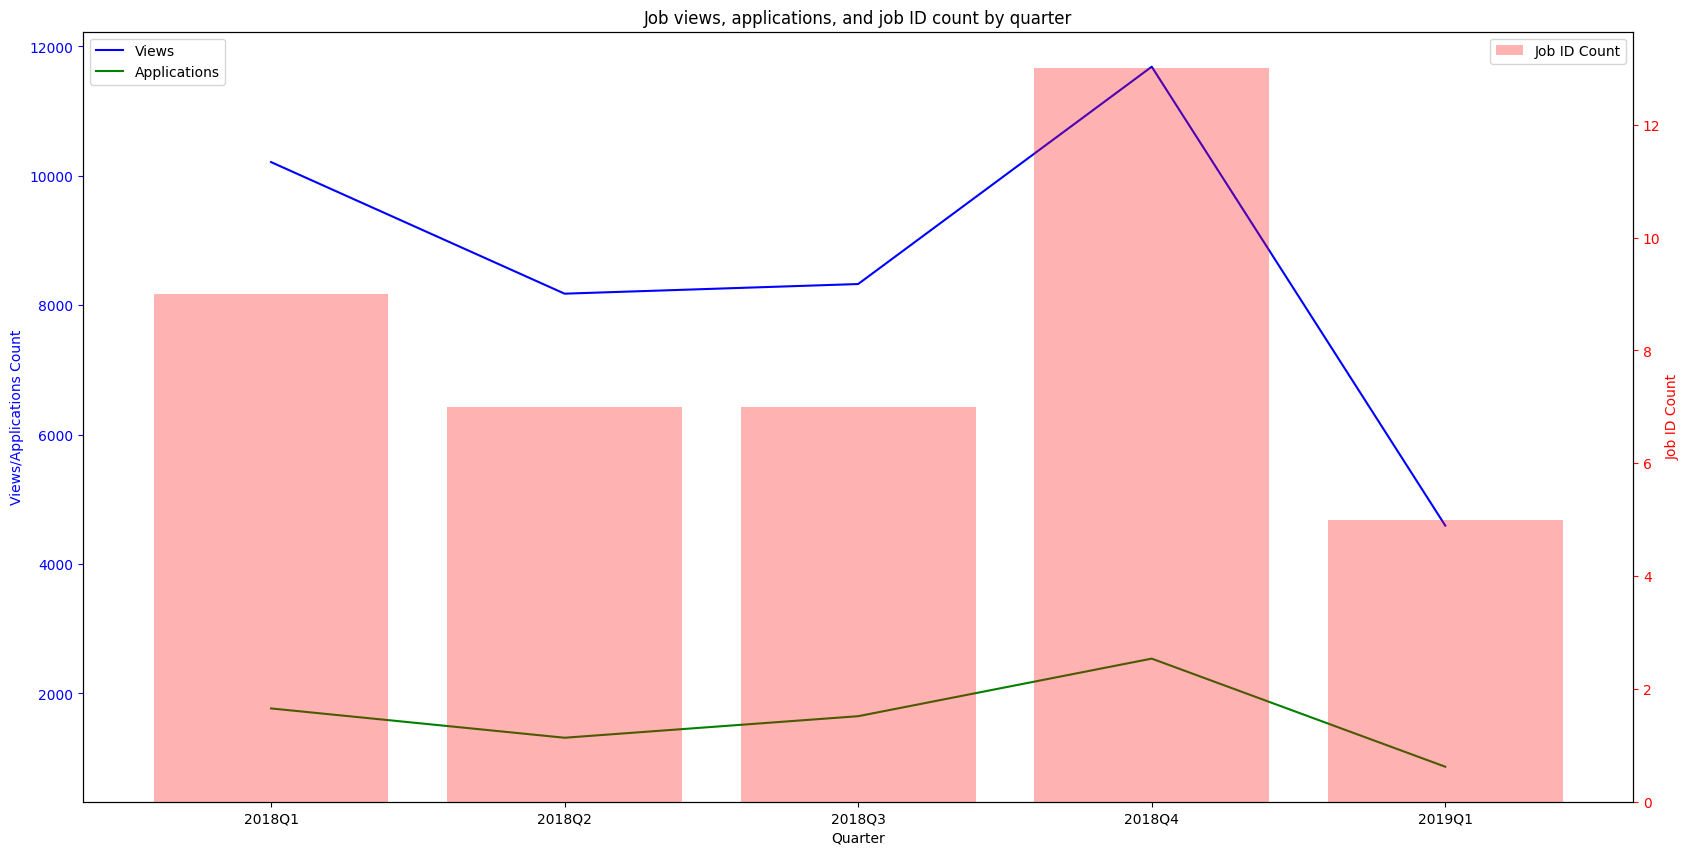

########## Europe - IT ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,4,144732,4883,847,0.173459,211.750000
1,2018Q2,8,376392,8841,1579,0.178600,197.375000
2,2018Q3,7,351877,7996,1313,0.164207,187.571429
3,2018Q4,9,416909,9302,1787,0.192109,198.555556
4,2019Q1,12,497177,12167,2315,0.190269,192.916667


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,8.000000,357417.400000,8637.800000,1568.200000,0.179729,197.633730
std,2.915476,131051.332608,2619.548377,545.654836,0.011682,8.995643
min,4.000000,144732.000000,4883.000000,847.000000,0.164207,187.571429
25%,7.000000,351877.000000,7996.000000,1313.000000,0.173459,192.916667
50%,8.000000,376392.000000,8841.000000,1579.000000,0.178600,197.375000
75%,9.000000,416909.000000,9302.000000,1787.000000,0.190269,198.555556
max,12.000000,497177.000000,12167.000000,2315.000000,0.192109,211.750000


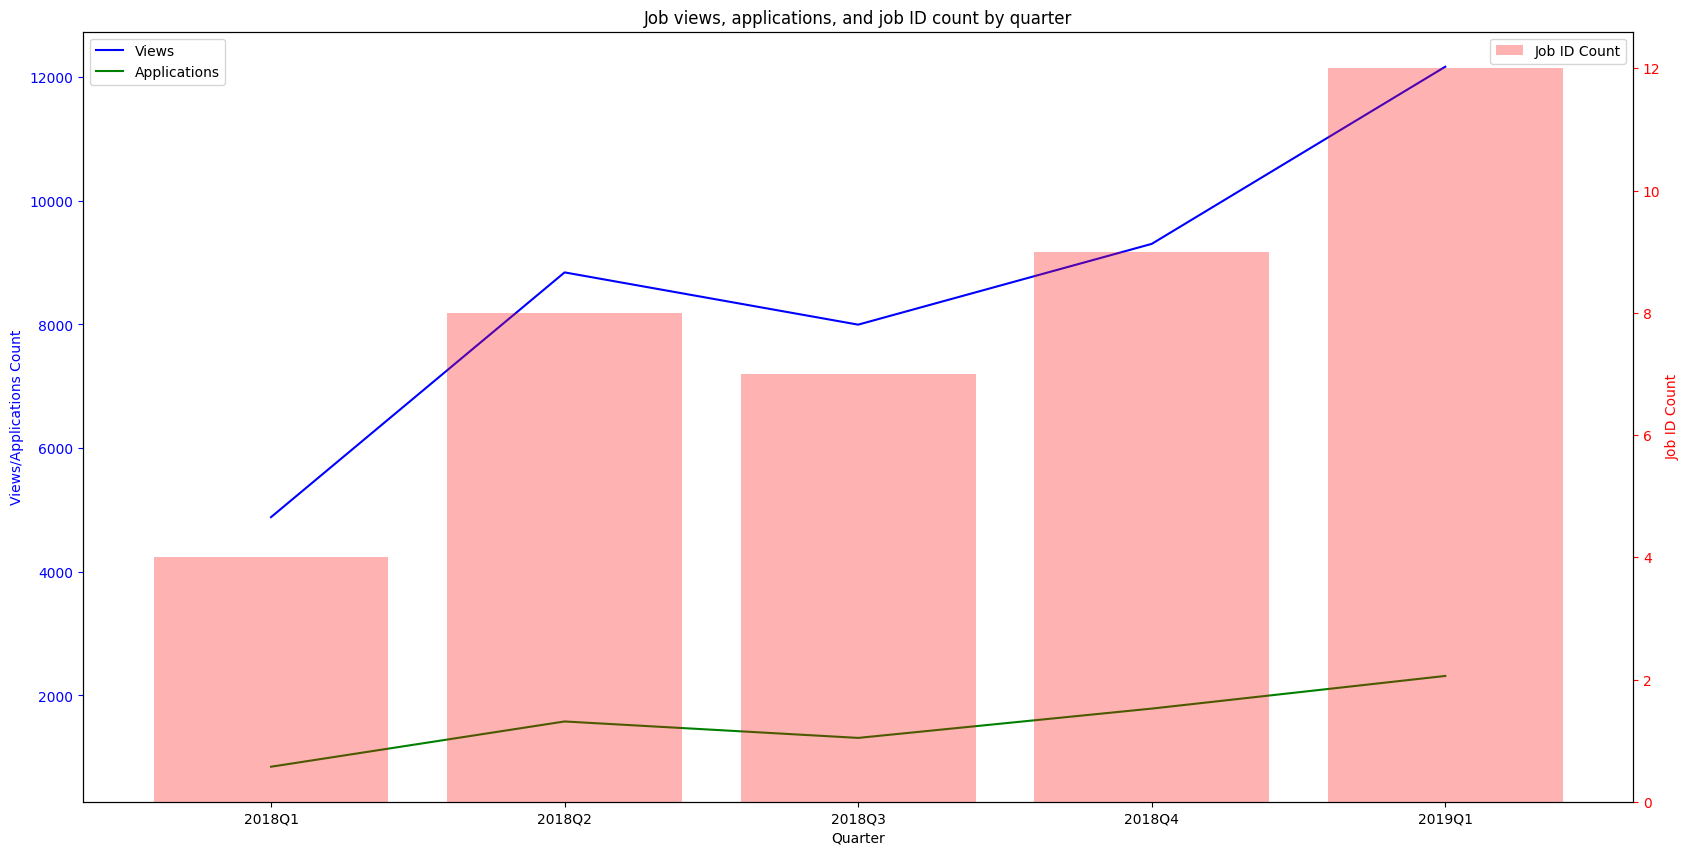

########## Europe - Human Resources ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,5,224973,3754,1011,0.269313,202.200000
1,2018Q2,15,818452,11594,3200,0.276005,213.333333
2,2018Q3,8,401685,8481,1637,0.193020,204.625000
3,2018Q4,19,832717,18558,3733,0.201153,196.473684
4,2019Q1,4,267098,3522,678,0.192504,169.500000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000,5.000000,5.000000,5.000000
mean,10.200000,508985.000000,9181.800,2051.800000,0.226399,197.226404
std,6.534524,296334.970441,6239.337,1349.763572,0.042434,16.645038
min,4.000000,224973.000000,3522.000,678.000000,0.192504,169.500000
25%,5.000000,267098.000000,3754.000,1011.000000,0.193020,196.473684
50%,8.000000,401685.000000,8481.000,1637.000000,0.201153,202.200000
75%,15.000000,818452.000000,11594.000,3200.000000,0.269313,204.625000
max,19.000000,832717.000000,18558.000,3733.000000,0.276005,213.333333


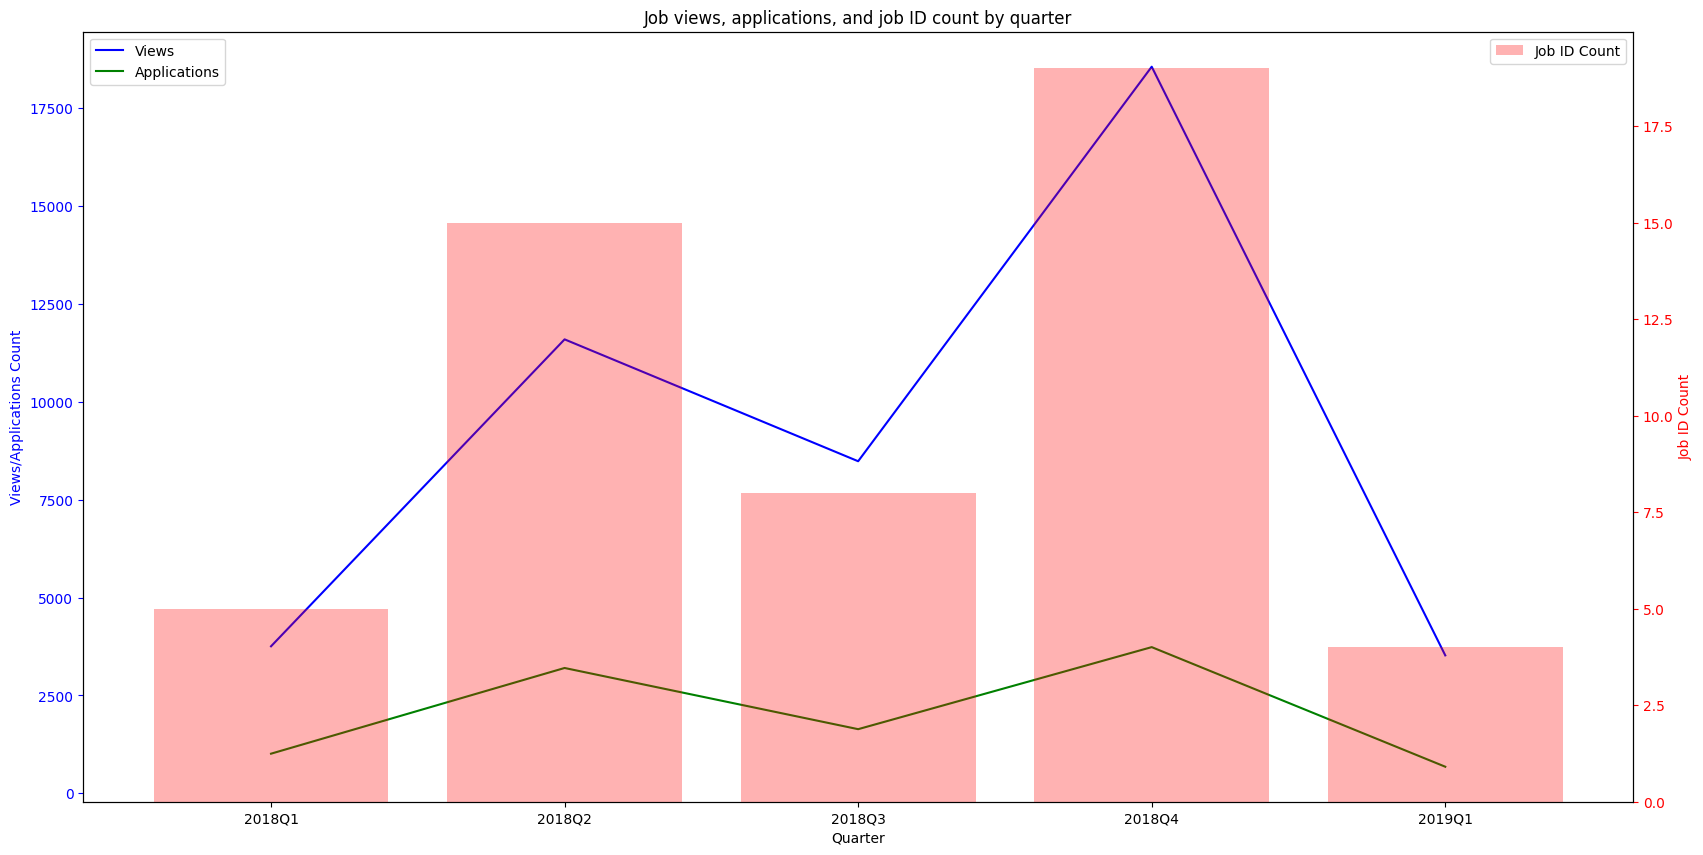

########## Europe - Support ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,10,517217,10014,1863,0.186040,186.300000
1,2018Q2,13,653365,13081,2050,0.156716,157.692308
2,2018Q3,9,357975,8513,1714,0.201339,190.444444
3,2018Q4,13,493565,13210,2823,0.213702,217.153846
4,2019Q1,5,255629,5960,1029,0.172651,205.800000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10.000000,455550.200000,10155.600000,1895.800000,0.186089,191.478120
std,3.316625,153189.441709,3090.654025,645.938619,0.022574,22.548402
min,5.000000,255629.000000,5960.000000,1029.000000,0.156716,157.692308
25%,9.000000,357975.000000,8513.000000,1714.000000,0.172651,186.300000
50%,10.000000,493565.000000,10014.000000,1863.000000,0.186040,190.444444
75%,13.000000,517217.000000,13081.000000,2050.000000,0.201339,205.800000
max,13.000000,653365.000000,13210.000000,2823.000000,0.213702,217.153846


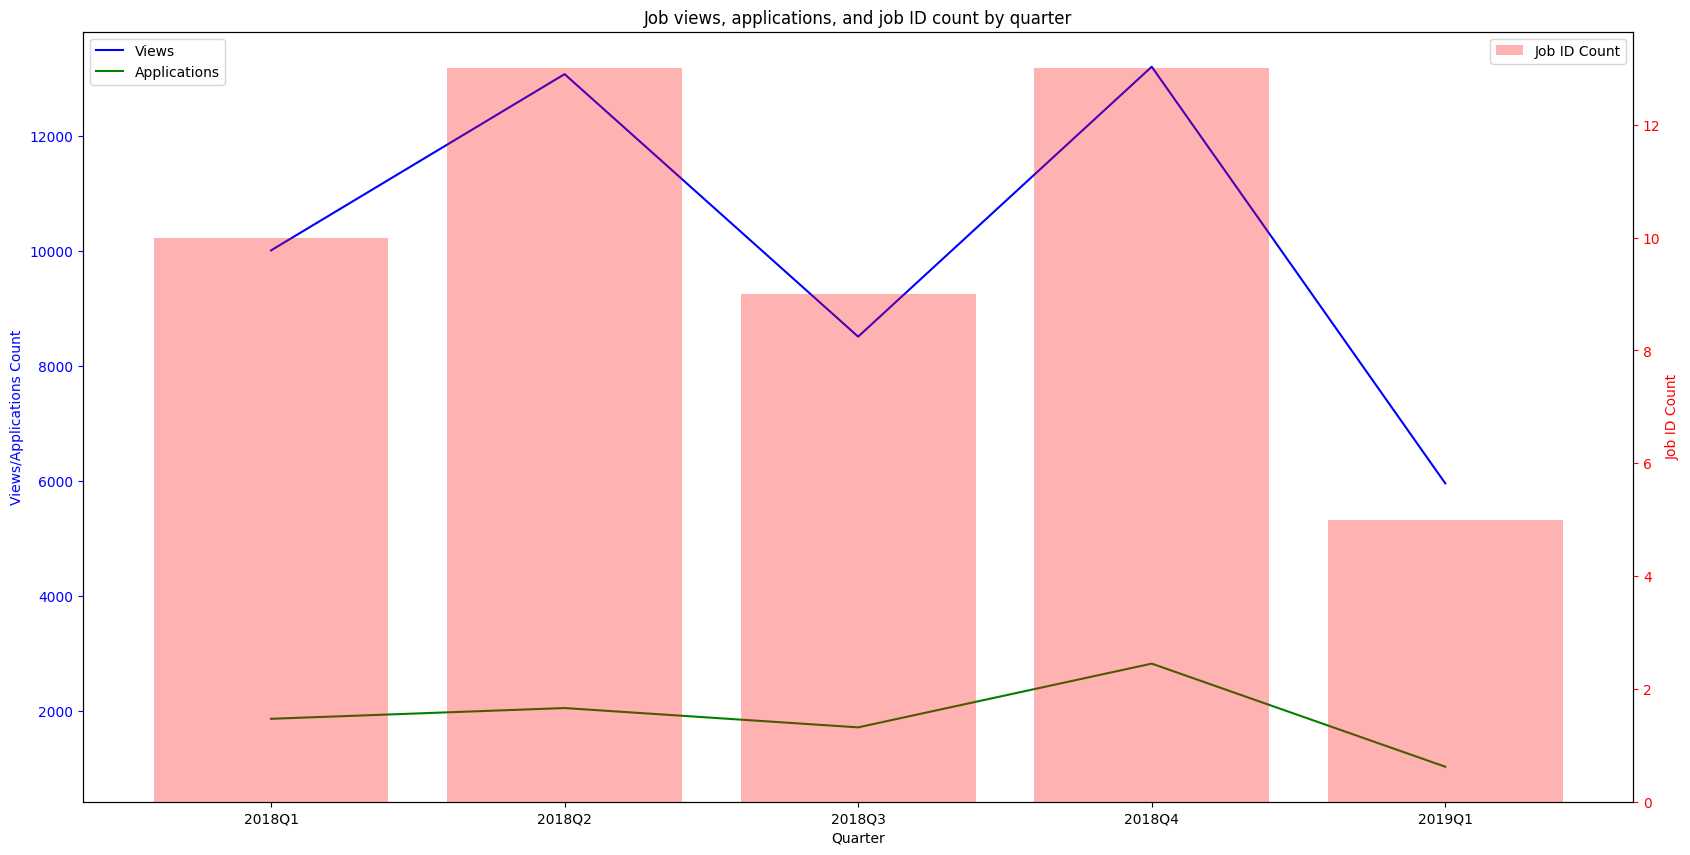

########## North America - Marketing ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,9,444646,7369,1631,0.221333,181.222222
1,2018Q2,11,399479,11130,2286,0.205391,207.818182
2,2018Q3,6,197052,7004,1600,0.228441,266.666667
3,2018Q4,10,367750,10479,2156,0.205745,215.600000
4,2019Q1,7,314791,8981,1235,0.137513,176.428571


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,8.600000,344743.600000,8992.600000,1781.60000,0.199684,209.547128
std,2.073644,95152.134681,1828.155163,432.73121,0.036160,36.060391
min,6.000000,197052.000000,7004.000000,1235.00000,0.137513,176.428571
25%,7.000000,314791.000000,7369.000000,1600.00000,0.205391,181.222222
50%,9.000000,367750.000000,8981.000000,1631.00000,0.205745,207.818182
75%,10.000000,399479.000000,10479.000000,2156.00000,0.221333,215.600000
max,11.000000,444646.000000,11130.000000,2286.00000,0.228441,266.666667


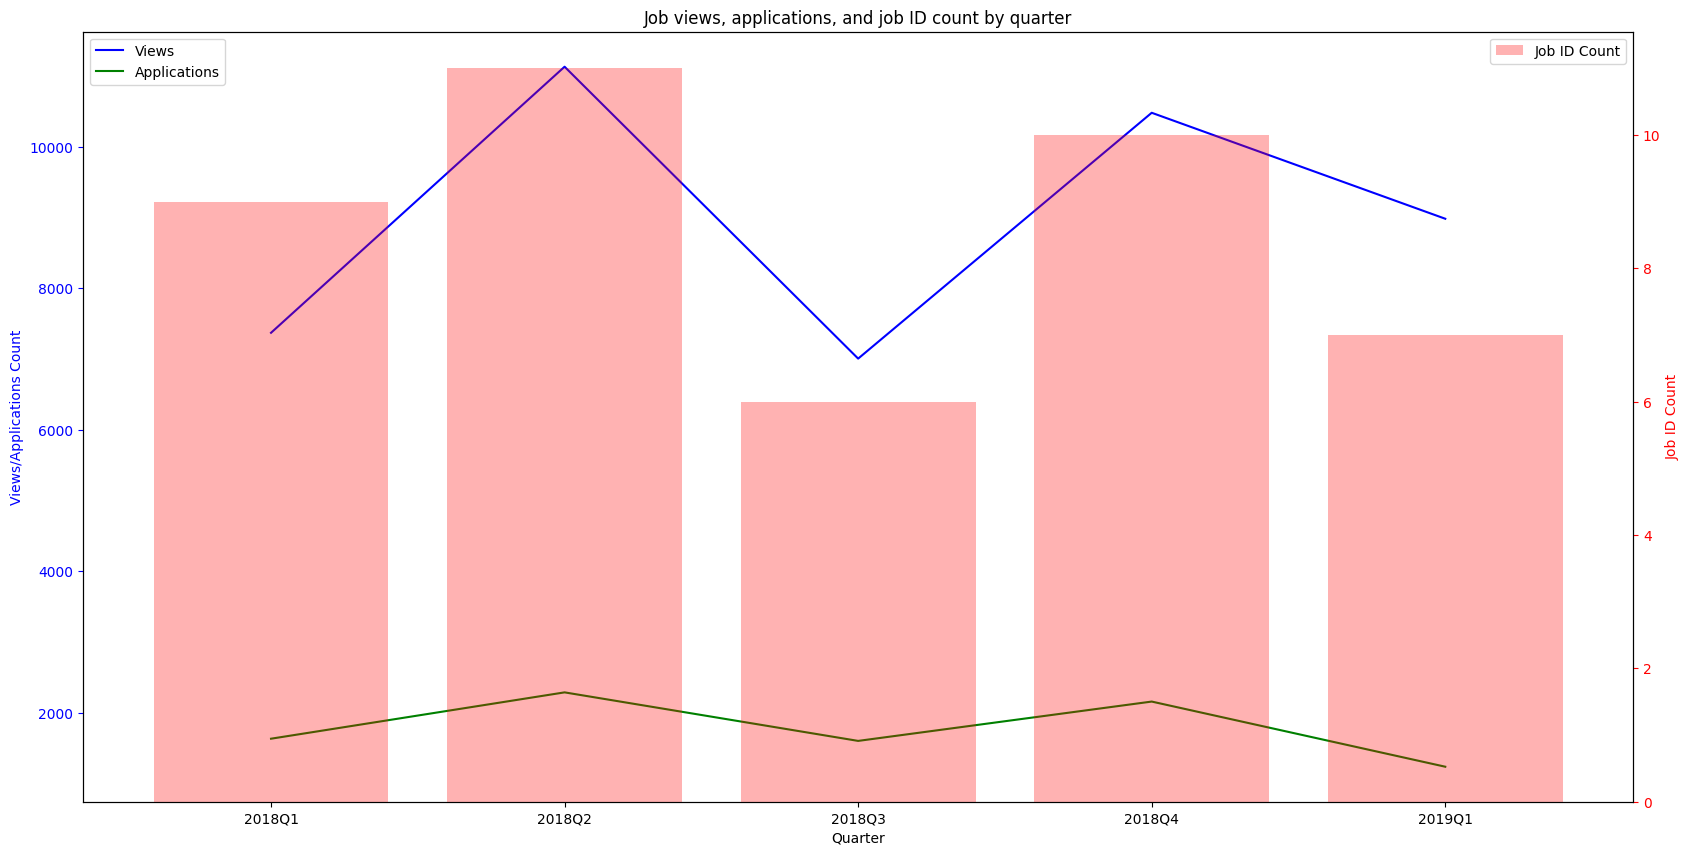

########## North America - Operations ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,20,729104,21115,4394,0.208099,219.700000
1,2018Q2,5,188480,5311,973,0.183205,194.600000
2,2018Q3,6,388217,6232,1117,0.179236,186.166667
3,2018Q4,15,619294,14714,3289,0.223529,219.266667
4,2019Q1,2,99612,2374,469,0.197557,234.500000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.600000,404941.400000,9949.200000,2048.400000,0.198325,210.846667
std,7.569676,269902.627866,7747.459887,1699.957588,0.018196,19.886017
min,2.000000,99612.000000,2374.000000,469.000000,0.179236,186.166667
25%,5.000000,188480.000000,5311.000000,973.000000,0.183205,194.600000
50%,6.000000,388217.000000,6232.000000,1117.000000,0.197557,219.266667
75%,15.000000,619294.000000,14714.000000,3289.000000,0.208099,219.700000
max,20.000000,729104.000000,21115.000000,4394.000000,0.223529,234.500000


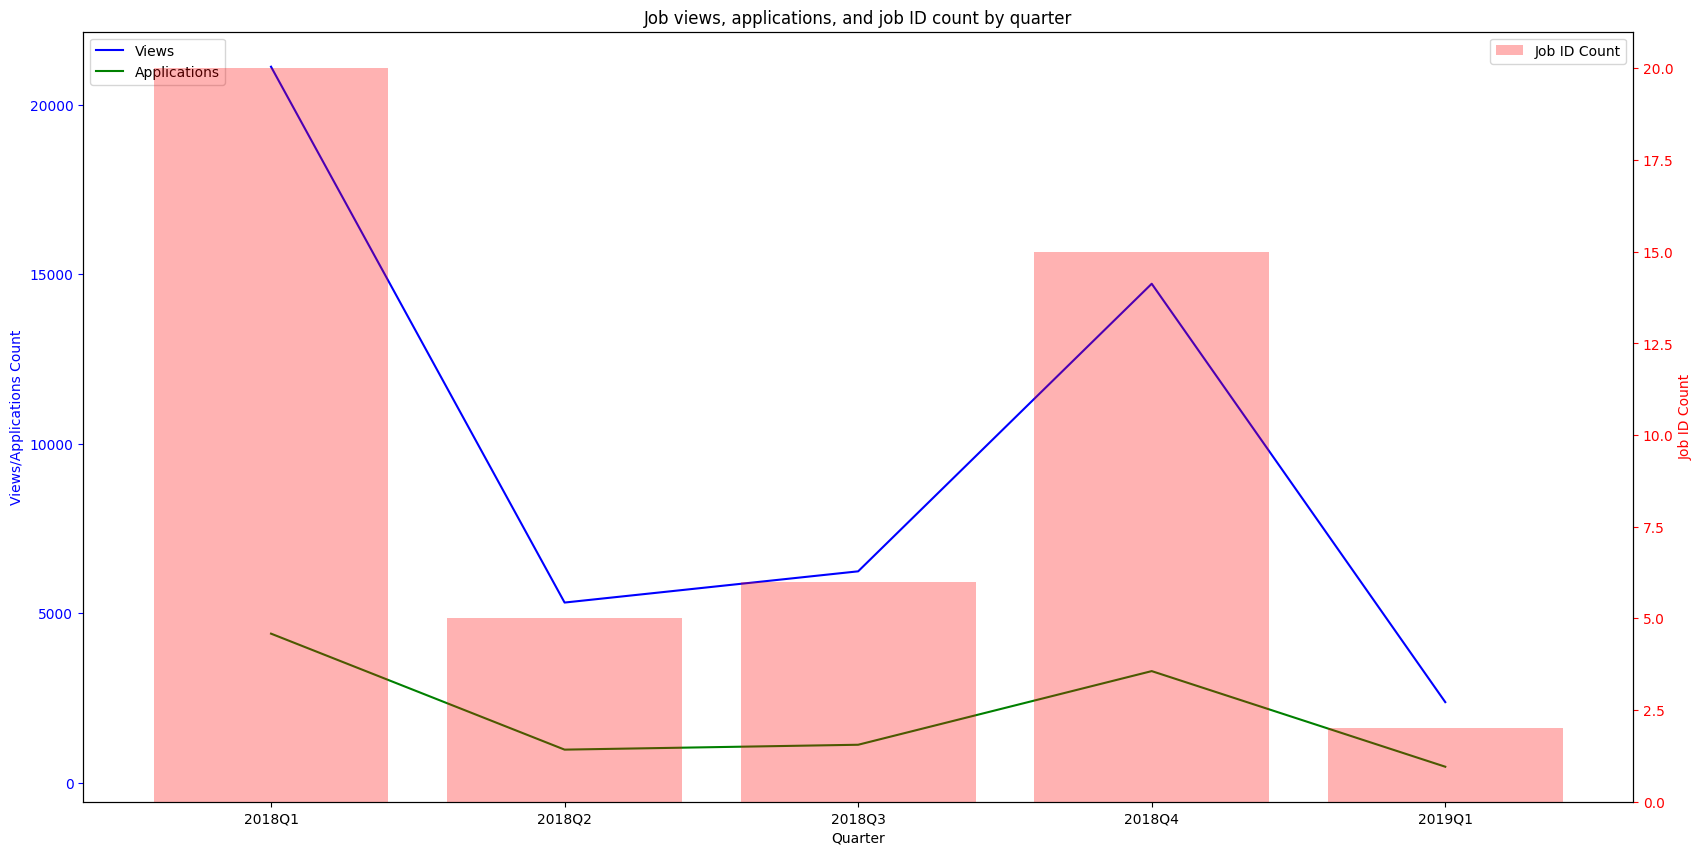

########## North America - Engineering ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,15,657295,16662,2659,0.159585,177.266667
1,2018Q2,9,408761,9305,1879,0.201934,208.777778
2,2018Q3,6,267737,5085,1336,0.262734,222.666667
3,2018Q4,9,385564,8804,1618,0.183780,179.777778
4,2019Q1,7,387380,7202,1191,0.165371,170.142857


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.20000,421347.400000,9411.600000,1736.600000,0.194681,191.726349
std,3.49285,143056.001602,4374.661164,579.509534,0.041513,22.725274
min,6.00000,267737.000000,5085.000000,1191.000000,0.159585,170.142857
25%,7.00000,385564.000000,7202.000000,1336.000000,0.165371,177.266667
50%,9.00000,387380.000000,8804.000000,1618.000000,0.183780,179.777778
75%,9.00000,408761.000000,9305.000000,1879.000000,0.201934,208.777778
max,15.00000,657295.000000,16662.000000,2659.000000,0.262734,222.666667


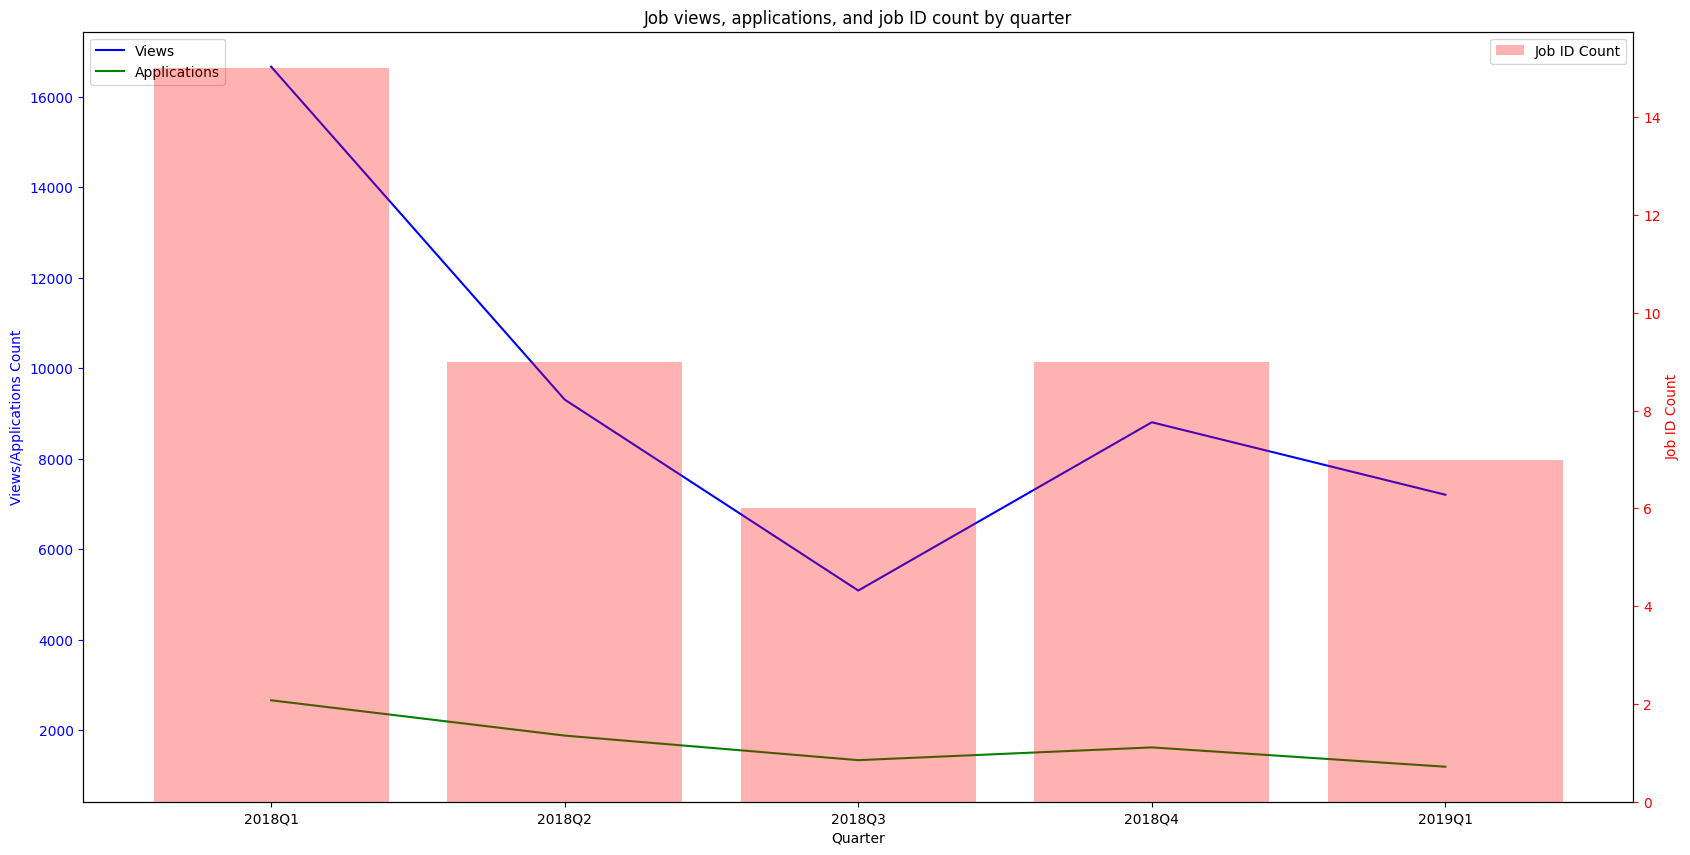

########## North America - Finance ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,6,321366,4486,1292,0.288007,215.333333
1,2018Q2,10,439964,9862,2023,0.205131,202.300000
2,2018Q3,7,290252,7361,1685,0.228909,240.714286
3,2018Q4,9,435241,9655,1776,0.183946,197.333333
4,2019Q1,6,223568,5755,1285,0.223284,214.166667


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7.60000,342078.200000,7423.800000,1612.200000,0.225855,213.969524
std,1.81659,94101.746643,2363.396856,320.341536,0.038938,16.808642
min,6.00000,223568.000000,4486.000000,1285.000000,0.183946,197.333333
25%,6.00000,290252.000000,5755.000000,1292.000000,0.205131,202.300000
50%,7.00000,321366.000000,7361.000000,1685.000000,0.223284,214.166667
75%,9.00000,435241.000000,9655.000000,1776.000000,0.228909,215.333333
max,10.00000,439964.000000,9862.000000,2023.000000,0.288007,240.714286


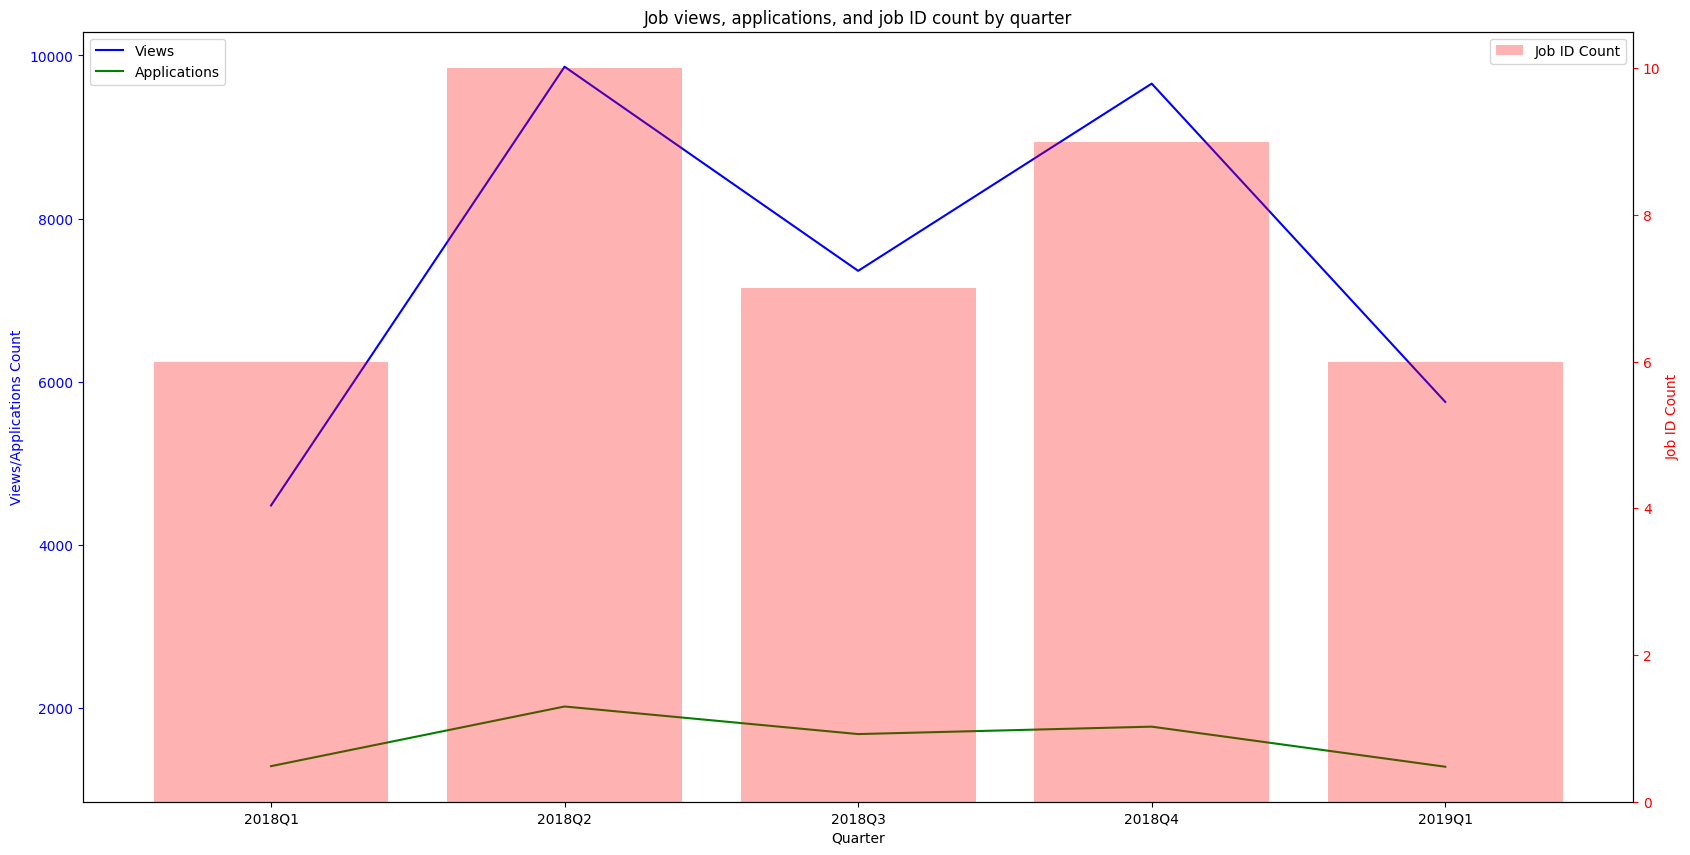

########## North America - Sales ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,8,417877,8718,1465,0.168043,183.125000
1,2018Q2,13,642935,12566,2918,0.232214,224.461538
2,2018Q3,5,212440,6147,1056,0.171791,211.200000
3,2018Q4,16,775710,17920,2854,0.159263,178.375000
4,2019Q1,6,254367,5203,1059,0.203536,176.500000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.600000,460665.800000,10110.800000,1870.400000,0.186970,194.732308
std,4.722288,244172.599453,5214.156567,942.191753,0.030322,21.735456
min,5.000000,212440.000000,5203.000000,1056.000000,0.159263,176.500000
25%,6.000000,254367.000000,6147.000000,1059.000000,0.168043,178.375000
50%,8.000000,417877.000000,8718.000000,1465.000000,0.171791,183.125000
75%,13.000000,642935.000000,12566.000000,2854.000000,0.203536,211.200000
max,16.000000,775710.000000,17920.000000,2918.000000,0.232214,224.461538


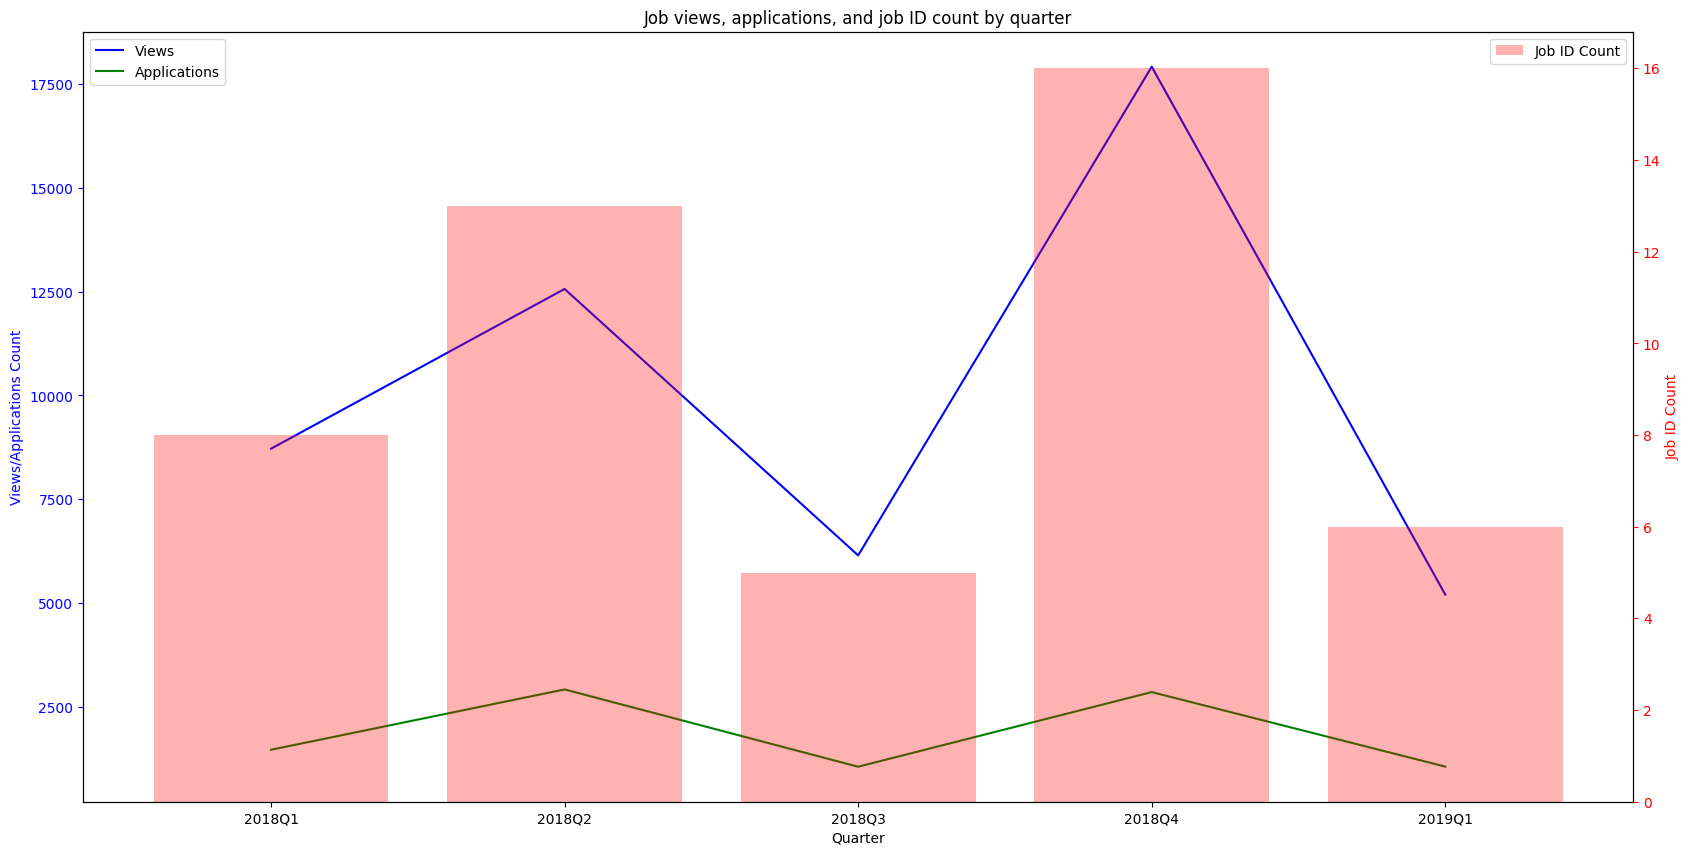

########## North America - IT ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q2,8,301557,8974,1625,0.181079,203.125000
1,2018Q3,7,369698,6585,1340,0.203493,191.428571
2,2018Q4,14,705079,13865,3001,0.216444,214.357143
3,2019Q1,10,389708,10747,2193,0.204057,219.300000


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000
mean,9.750000,441510.500000,10042.750000,2039.75000,0.201268,207.052679
std,3.095696,179718.178006,3066.149852,732.38304,0.014727,12.421641
min,7.000000,301557.000000,6585.000000,1340.00000,0.181079,191.428571
25%,7.750000,352662.750000,8376.750000,1553.75000,0.197889,200.200893
50%,9.000000,379703.000000,9860.500000,1909.00000,0.203775,208.741071
75%,11.000000,468550.750000,11526.500000,2395.00000,0.207154,215.592857
max,14.000000,705079.000000,13865.000000,3001.00000,0.216444,219.300000


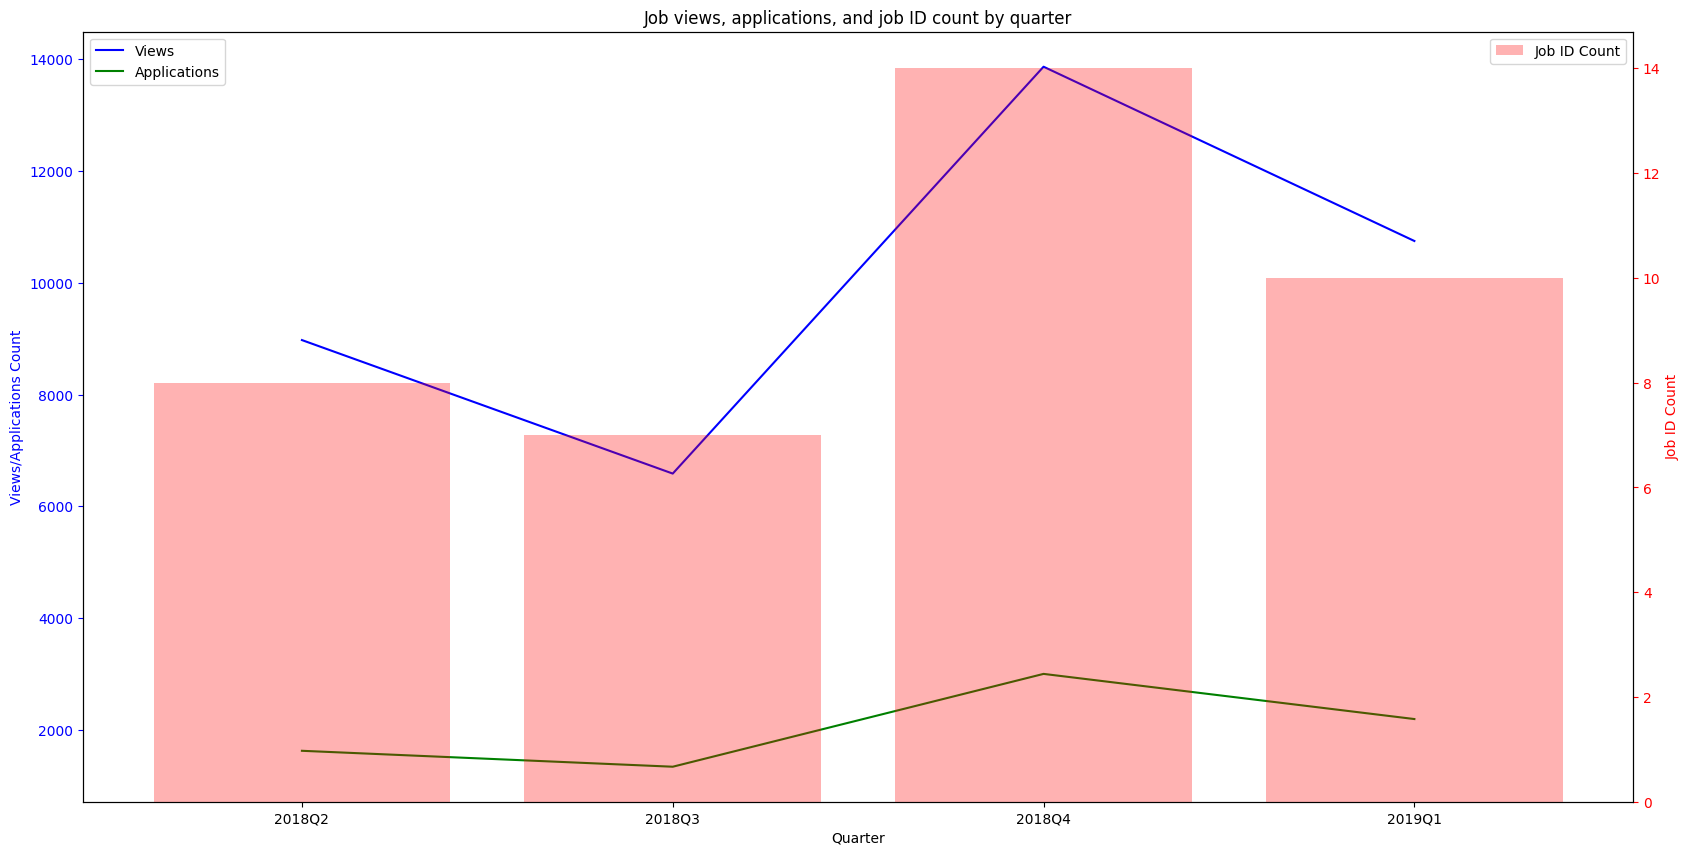

########## North America - Human Resources ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,10,378942,9296,2459,0.264522,245.900000
1,2018Q2,8,256064,8358,1743,0.208543,217.875000
2,2018Q3,6,182969,6548,1062,0.162187,177.000000
3,2018Q4,16,627059,17006,3122,0.183582,195.125000
4,2019Q1,7,313997,7240,1244,0.171823,177.714286


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,9.400000,351806.20000,9689.600000,1926.000000,0.198131,202.722857
std,3.974921,170001.88243,4222.794667,860.176435,0.040963,29.320106
min,6.000000,182969.00000,6548.000000,1062.000000,0.162187,177.000000
25%,7.000000,256064.00000,7240.000000,1244.000000,0.171823,177.714286
50%,8.000000,313997.00000,8358.000000,1743.000000,0.183582,195.125000
75%,10.000000,378942.00000,9296.000000,2459.000000,0.208543,217.875000
max,16.000000,627059.00000,17006.000000,3122.000000,0.264522,245.900000


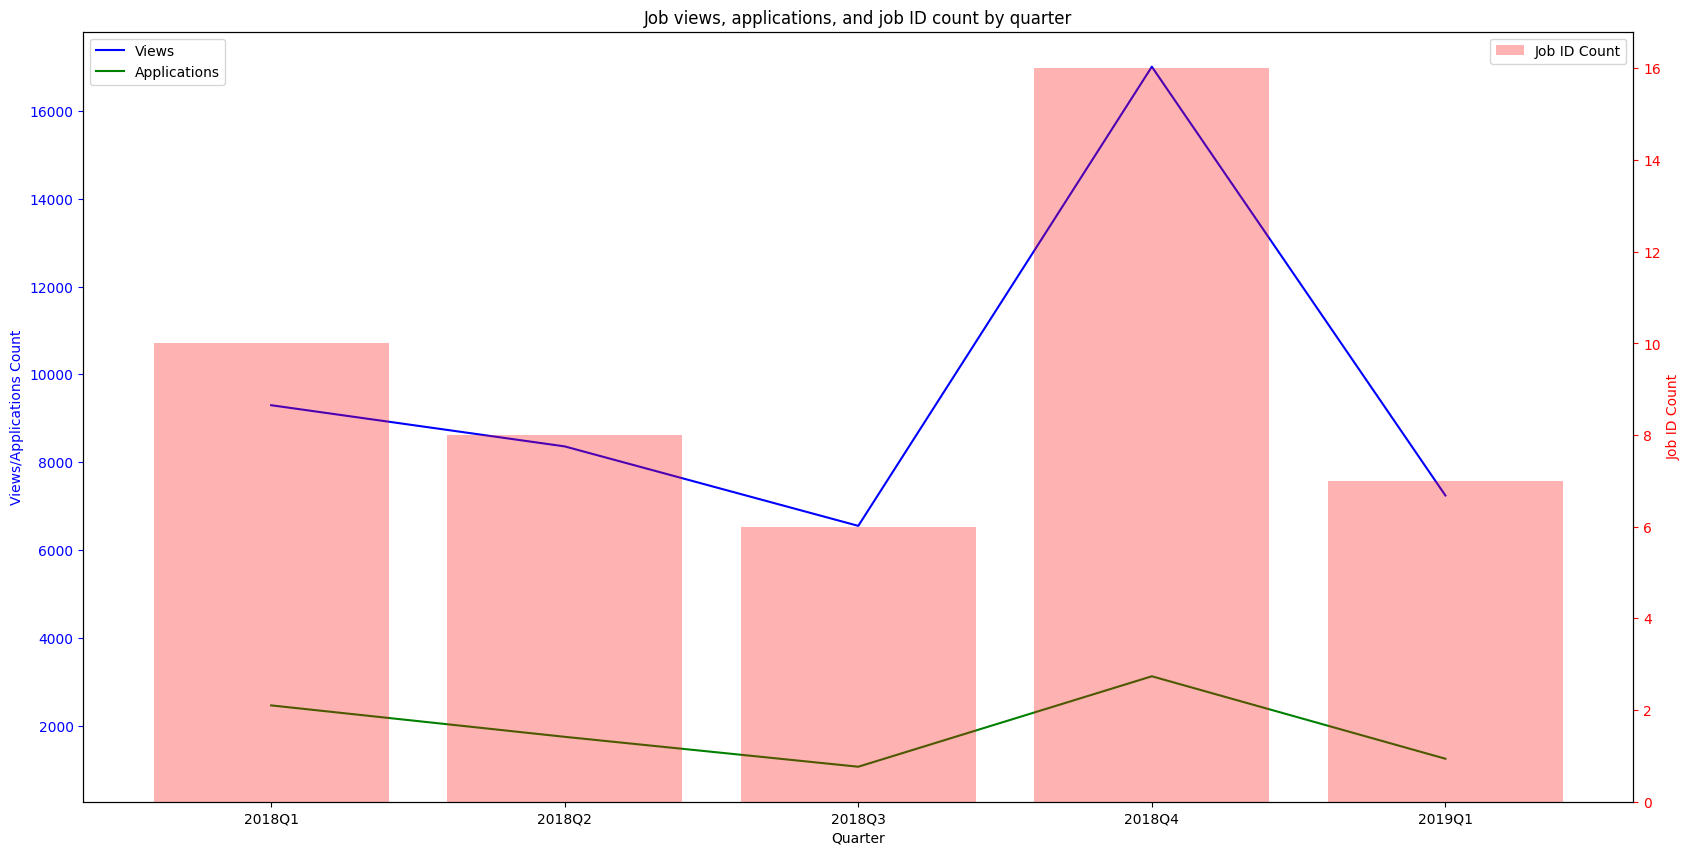

########## North America - Support ##########


,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,11,474905,9995,1946,0.194697,176.909091
1,2018Q2,11,465792,10233,2342,0.228867,212.909091
2,2018Q3,6,262619,6284,1191,0.189529,198.500000
3,2018Q4,14,540963,14945,2809,0.187956,200.642857
4,2019Q1,6,268684,6428,1241,0.193062,206.833333


,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.600000,402592.600000,9577.000000,1905.800000,0.198822,199.158874
std,3.507136,128348.876895,3541.910995,700.099064,0.017010,13.653342
min,6.000000,262619.000000,6284.000000,1191.000000,0.187956,176.909091
25%,6.000000,268684.000000,6428.000000,1241.000000,0.189529,198.500000
50%,11.000000,465792.000000,9995.000000,1946.000000,0.193062,200.642857
75%,11.000000,474905.000000,10233.000000,2342.000000,0.194697,206.833333
max,14.000000,540963.000000,14945.000000,2809.000000,0.228867,212.909091


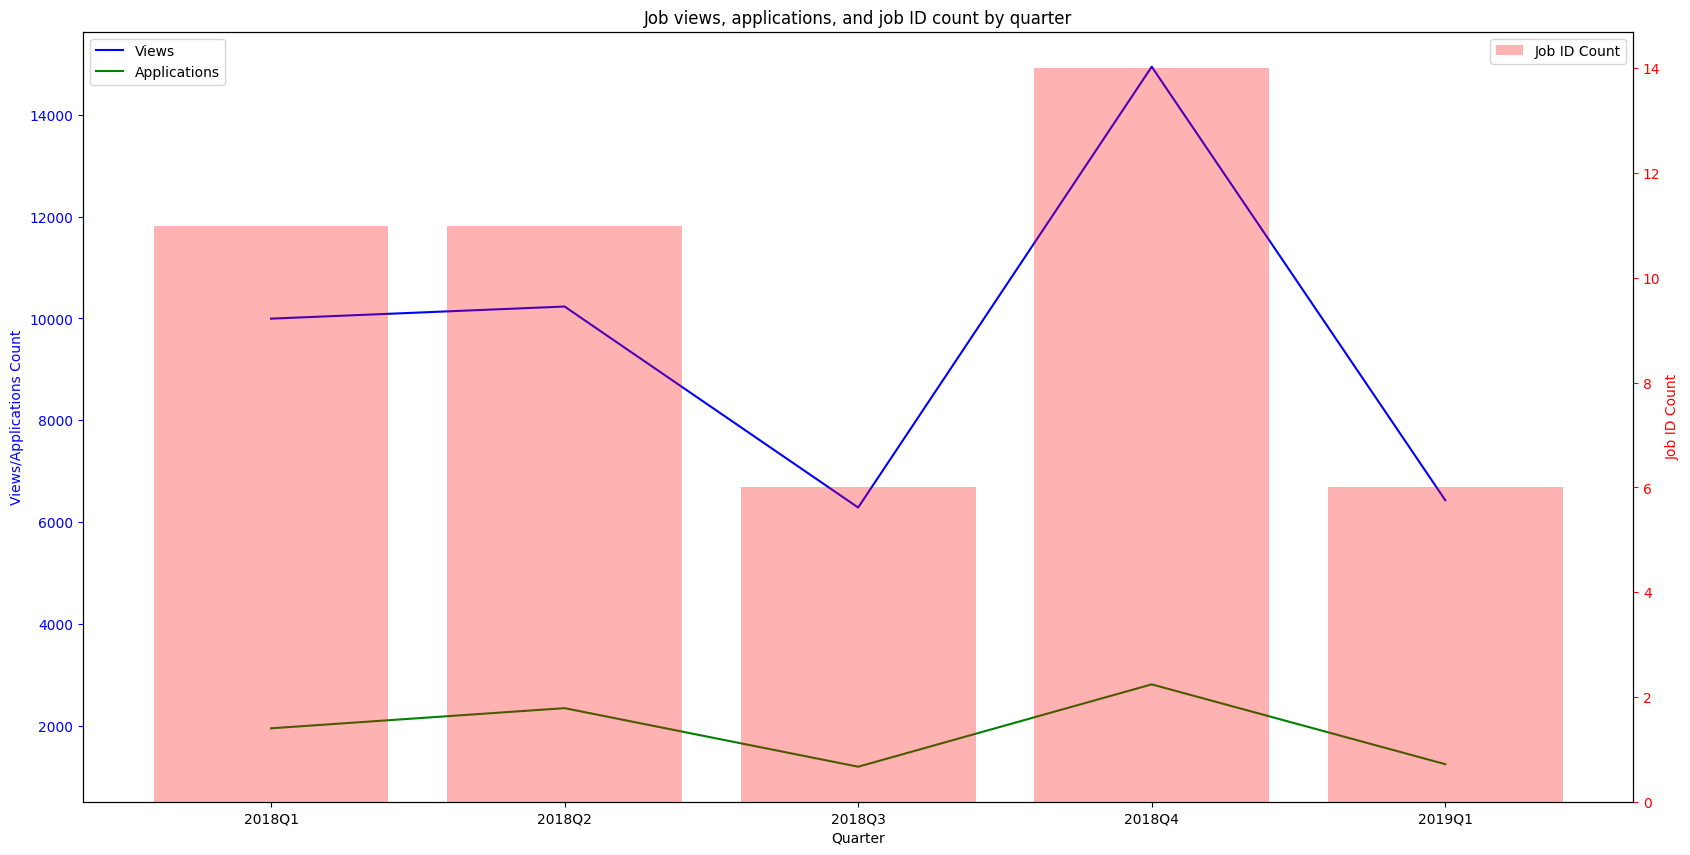

In [154]:
# df_filtered = df_filtered[~((df_filtered['YEAR'] == 2019) & (df_filtered['QUARTER'] == 2))]

region_job_quarter_df = pd.DataFrame()

for region in job_regions_list:
    for function in job_functions_list:
        df_filtered = df[~((df['POSTED_YEAR'] == 2019) & (df['POSTED_QUARTER'] == 2))]
        df_filtered = df_filtered[df_filtered['JOB_REGION'] == region]
        df_filtered = df_filtered[df_filtered['JOB_FUNCTION'] == function]

        df_filtered = df_filtered.groupby(['POSTED_YEAR_QUARTER']).agg({
            'JOB_ID': 'count',
            'JOB_IMPRESSIONS': 'sum',
            'JOB_VIEWS': 'sum',
            'JOB_APPLICATIONS': 'sum'}).reset_index()

        df_filtered['APPLICATION_RATIO'] = df_filtered['JOB_APPLICATIONS'] / df_filtered['JOB_VIEWS']
        df_filtered['APPLICATIONS_PER_JOB'] = df_filtered['JOB_APPLICATIONS'] / df_filtered['JOB_ID']

        plt.figure(figsize=(20, 10))

        # Create the primary y-axis for the line graphs
        ax1 = plt.gca()  # Get current axis
        ax1.plot(df_filtered['POSTED_YEAR_QUARTER'], df_filtered['JOB_VIEWS'], label='Views', color='blue')
        ax1.plot(df_filtered['POSTED_YEAR_QUARTER'], df_filtered['JOB_APPLICATIONS'], label='Applications', color='green')

        # Set labels for the primary y-axis
        ax1.set_ylabel('Views/Applications Count', color='blue')
        ax1.tick_params('y', colors='blue')

        # Create the secondary y-axis for the bar chart
        ax2 = ax1.twinx()  # Create another axis that shares the same x-axis
        ax2.bar(df_filtered['POSTED_YEAR_QUARTER'], df_filtered['JOB_ID'], alpha=0.3, label='Job ID Count', color='red')

        # Set labels for the secondary y-axis
        ax2.set_ylabel('Job ID Count', color='red')
        ax2.tick_params('y', colors='red')

        # Set common labels and title
        plt.title('Job views, applications, and job ID count by quarter')
        ax1.set_xlabel('Quarter')
        plt.xticks(rotation=45)

        # Set legends
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        print(f'########## {region} - {function} ##########')
        display(df_filtered)
        display(df_filtered.describe())
        
        plt.show()


In [155]:
df_filtered = df[~((df['POSTED_YEAR'] == 2019) & (df['POSTED_QUARTER'] == 2))]

# Let's look at summary of Job region and job function and sort by Region and function to group them all together
region_job_quarter_df = df_filtered.groupby(['JOB_REGION', 'JOB_FUNCTION']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
region_job_quarter_df['APPLICATION_RATIO'] = region_job_quarter_df['JOB_APPLICATIONS'] / region_job_quarter_df['JOB_VIEWS']
region_job_quarter_df['APPLICATIONS_PER_JOB'] = region_job_quarter_df['JOB_APPLICATIONS'] / region_job_quarter_df['JOB_ID']
region_job_quarter_df.sort_values(by=['JOB_REGION', 'JOB_FUNCTION'], inplace=True)
display(region_job_quarter_df)

# Look at just the job region and sort by Region and sort by application ratio to see how they compare
region_df = df_filtered.groupby(['JOB_REGION']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
region_df['APPLICATION_RATIO'] = region_df['JOB_APPLICATIONS'] / region_df['JOB_VIEWS']
region_df['APPLICATIONS_PER_JOB'] = region_df['JOB_APPLICATIONS'] / region_df['JOB_ID']
region_df.sort_values(by=['APPLICATION_RATIO'], inplace=True)
display(region_df)

# Look at just the job function to see how they compare
function_df = df_filtered.groupby(['JOB_FUNCTION']).agg({
    'JOB_ID': 'count',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
function_df['APPLICATION_RATIO'] = function_df['JOB_APPLICATIONS'] / function_df['JOB_VIEWS']
function_df['APPLICATIONS_PER_JOB'] = function_df['JOB_APPLICATIONS'] / function_df['JOB_ID']
display(function_df)





,JOB_REGION,JOB_FUNCTION,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,Asia Pacific,Engineering,71,3184520,74090,14247,0.192293,200.661972
1,Asia Pacific,Finance,46,2077828,48668,9098,0.186940,197.782609
2,Asia Pacific,Human Resources,45,2040348,44220,9202,0.208096,204.488889
3,Asia Pacific,IT,51,2208375,47605,10504,0.220649,205.960784
4,Asia Pacific,Marketing,44,1933643,43823,8856,0.202086,201.272727
5,Asia Pacific,Operations,49,2220691,52746,9203,0.174478,187.816327
6,Asia Pacific,Sales,46,2058125,45053,8945,0.198544,194.456522
7,Asia Pacific,Support,38,1708231,41030,7272,0.177236,191.368421
8,Europe,Engineering,43,2085812,39484,8748,0.221558,203.441860
9,Europe,Finance,46,2068033,45877,9258,0.201800,201.260870


,JOB_REGION,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,Asia Pacific,390,17431761,397235,77327,0.194663,198.274359
1,Europe,372,17205245,372712,73650,0.197606,197.983871
3,North America,357,15406918,365944,72564,0.198293,203.260504
2,Latin America,385,17510783,379952,77733,0.204586,201.903896


,JOB_FUNCTION,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB
0,Engineering,207,9678417,205313,40945,0.199427,197.801932
1,Finance,173,7913384,173479,35013,0.201828,202.387283
2,Human Resources,196,8727517,192922,39633,0.205435,202.209184
3,IT,171,7419701,169599,35017,0.206469,204.777778
4,Marketing,198,8444035,201036,39627,0.197114,200.136364
5,Operations,191,8664466,197692,38609,0.195299,202.141361
6,Sales,183,8614124,189264,36030,0.190369,196.885246
7,Support,185,8093063,186538,36400,0.195135,196.756757


In [93]:
# Looking to see if any percentage of Jobs are getting a high percentage of applications

total_job_applications = function_df['JOB_APPLICATIONS'].sum()

for index, row in function_df.iterrows():
    print(f'{row["JOB_FUNCTION"]}: {round(row["JOB_APPLICATIONS"] / total_job_applications *100, 2)}%')



Sales: 11.96%
Support: 12.08%
Operations: 12.82%
Marketing: 13.15%
Engineering: 13.59%
Finance: 11.62%
Human Resources: 13.16%
IT: 11.62%


In [95]:
# Looking to see if any percentage of Jobs are getting a high percentage of posts

total_jobs = function_df['JOB_ID'].sum()
for index,row in function_df.iterrows():
    print(f'{row["JOB_FUNCTION"]}: {round(row["JOB_ID"] / total_jobs *100, 2)}%')

Sales: 12.17%
Support: 12.3%
Operations: 12.7%
Marketing: 13.16%
Engineering: 13.76%
Finance: 11.5%
Human Resources: 13.03%
IT: 11.37%


In [110]:
# Let's build a table to export it to make it easier to build charts for the presentation

quarter_list = list(df['POSTED_QUARTER'].unique())
year_list = list(df['POSTED_YEAR'].unique())

test_df = pd.DataFrame()

for year in year_list:
    for quarter in quarter_list:
        if year == 2019 and quarter == 2:
            pass
        else:
            df_filtered = df[df['POSTED_QUARTER'] == quarter]
            df_filtered = df_filtered[df_filtered['POSTED_YEAR'] == year]
            
            region_job_quarter_df = df_filtered.groupby(['JOB_REGION', 'JOB_FUNCTION']).agg({
                'JOB_ID': 'count',
                'JOB_IMPRESSIONS': 'sum',
                'JOB_VIEWS': 'sum',
                'JOB_APPLICATIONS': 'sum'}).reset_index()

            region_job_quarter_df['APPLICATION_RATIO'] = region_job_quarter_df['JOB_APPLICATIONS'] / region_job_quarter_df['JOB_VIEWS']
            region_job_quarter_df['APPLICATIONS_PER_JOB'] = region_job_quarter_df['JOB_APPLICATIONS'] / region_job_quarter_df['JOB_ID']
            region_job_quarter_df['YEAR'] = year
            region_job_quarter_df['QUARTER'] = quarter
            # region_job_quarter_df.sort_values(by=['APPLICATION_RATIO'], inplace=True)
            # region_job_quarter_df.to_csv('region_job_quarter_df.csv', index=False)
            test_df = pd.concat([test_df, region_job_quarter_df], ignore_index=True)
        
display(test_df)

test_df.to_csv('charts.csv', index=False)

,JOB_REGION,JOB_FUNCTION,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,APPLICATION_RATIO,APPLICATIONS_PER_JOB,YEAR,QUARTER
0,Asia Pacific,Engineering,20,827467,21691,4070,0.187635,203.500000,2018,1
1,Asia Pacific,Finance,8,341077,8550,1507,0.176257,188.375000,2018,1
2,Asia Pacific,Human Resources,10,492196,10784,1776,0.164688,177.600000,2018,1
3,Asia Pacific,IT,16,609723,15478,3475,0.224512,217.187500,2018,1
4,Asia Pacific,Marketing,11,516834,11639,1962,0.168571,178.363636,2018,1
...,...,...,...,...,...,...,...,...,...,...
154,North America,IT,10,389708,10747,2193,0.204057,219.300000,2019,1
155,North America,Marketing,7,314791,8981,1235,0.137513,176.428571,2019,1
156,North America,Operations,2,99612,2374,469,0.197557,234.500000,2019,1
157,North America,Sales,6,254367,5203,1059,0.203536,176.500000,2019,1


In [156]:
# Let's build another table to export it to make it easier to build charts for the presentation

charts_df = df[~((df['POSTED_YEAR'] == 2019) & (df['POSTED_QUARTER'] == 2))]
charts_df = charts_df.groupby(['POSTED_YEAR_QUARTER']).agg({
    'JOB_ID': 'nunique',
    'JOB_IMPRESSIONS': 'sum',
    'JOB_VIEWS': 'sum',
    'JOB_APPLICATIONS': 'sum'}).reset_index()
charts_df['ACCEPTED_OFFERS'] = charts_df['JOB_ID'] * 0.91
charts_df['ACCEPTED_OFFERS'] = charts_df['ACCEPTED_OFFERS'].astype(int)
charts_df['APPLICATION_RATIO'] = charts_df['JOB_APPLICATIONS'] / charts_df['JOB_VIEWS']
charts_df['IMPRESSIONS_APP_RATIO'] = charts_df['JOB_IMPRESSIONS'] / charts_df['JOB_APPLICATIONS']
charts_df['APPLICATIONS_PER_JOB'] = charts_df['JOB_APPLICATIONS'] / charts_df['JOB_ID']

display(charts_df)

,POSTED_YEAR_QUARTER,JOB_ID,JOB_IMPRESSIONS,JOB_VIEWS,JOB_APPLICATIONS,ACCEPTED_OFFERS,APPLICATION_RATIO,IMPRESSIONS_APP_RATIO,APPLICATIONS_PER_JOB
0,2018Q1,325,14647639,325701,65251,295,0.200340,224.481449,200.772308
1,2018Q2,284,13574763,296911,60324,258,0.203172,225.030883,212.408451
2,2018Q3,231,10284137,240070,48270,210,0.201066,213.054423,208.961039
3,2018Q4,392,18255277,414427,80447,356,0.194116,226.923030,205.221939
4,2019Q1,232,10792891,238734,46982,211,0.196796,229.723958,202.508621


In [ ]:
# Potential SQL to get the data provided

# SELECT
#     COMPANY
#     , DATE
#     , JOB_ID
#     , JOB_FUNCTION
#     , JOB_REGION
#     , JOB_IMPRESSIONS
#     , JOB_VIEWS
#     , JOB_APPLICATIONS
# FROM
#     TABLE
# WHERE
#     COMPANY = 'COMPANY_ABC'
# AND
#     DATE BETWEEN '2018-01-01' AND '2019-04-01'
# ORDER BY DATE DESC;

########## OR ##########

# SELECT 
#     COMPANY
#     , DATE
#     , JOB_ID
#     , JOB_FUNCTION
#     , JOB_REGION
#     , SUM(CASE WHEN activity_type = 'IMPRESSION' THEN 1 ELSE 0 END) AS JOB_IMPRESSIONS
#     , SUM(CASE WHEN activity_type = 'VIEW' THEN 1 ELSE 0 END) AS JOB_VIEWS
#     , SUM(CASE WHEN activity_type = 'APPLICATION' THEN 1 ELSE 0 END) AS JOB_APPLICATIONS
# FROM
#     TABLE
# WHERE
#     COMPANY = 'COMPANY_ABC'
#     AND DATE BETWEEN '2018-01-01' AND '2019-04-01' 
# GROUP BY
#     COMPANY
#     , DATE
#     , JOB_ID
#     , JOB_FUNCTION
#     , JOB_REGION
# ORDER BY DATE DESC;

